# Exploring the simulation results

## Imports

In [23]:
import pandas as pd
import numpy as np
import statistics

import matplotlib
import matplotlib.pyplot as plt

import matplotlib.pylab as pylab

from tqdm import tqdm

from infant_abm.db_utils import load_run

params = {
    "legend.fontsize": "x-large",
    "figure.figsize": (8, 5),
    "axes.labelsize": "x-large",
    "axes.titlesize": "x-large",
    "xtick.labelsize": "x-large",
    "ytick.labelsize": "x-large",
}
pylab.rcParams.update(params)

## Helper functions

In [4]:
def plot_params_3d(ax, perc, pers, coord, title=None, coord_lim=[0, 1], s=40, **kwargs):
    ax.set_xlim([0, 1])
    ax.set_ylim([0, 1])
    ax.set_zlim(coord_lim)

    ax.set_xlabel("perception", fontweight="bold")
    ax.set_ylabel("persistence", fontweight="bold")
    ax.set_zlabel("coordination", fontweight="bold")

    plot = ax.scatter3D(
        perc, pers, coord, cmap=plt.get_cmap("viridis_r"), s=s, **kwargs
    )
    plt.title(title)

    ax.set_box_aspect(None, zoom=0.85)
    # ax.tick_params(axis="x", pad=30)

    ax.xaxis.labelpad = 10
    ax.yaxis.labelpad = 40
    ax.zaxis.labelpad = 45

    return plot

In [5]:
def create_heatmap(
    heatmap_data,
    param1,
    param2,
    labelsx=None,
    labelsy=None,
    figsize=(6, 6),
    invert_colors=False,
    title="",
    show_text=True,
):
    show_ticks = labelsx is not None or labelsy is not None

    if show_ticks:
        assert heatmap_data.shape == (len(labelsy), len(labelsx))

    colormap_data = np.nan_to_num(heatmap_data, nan=(np.nanmax(heatmap_data) + 100))

    fig, ax = plt.subplots(figsize=figsize)

    if invert_colors:
        cmap = matplotlib.colormaps["viridis_r"]
    else:
        cmap = matplotlib.colormaps["viridis"]
    im = ax.imshow(colormap_data, cmap=cmap)

    # Show all ticks and label them with the respective list entries

    if labelsx is not None and labelsy is not None:
        ax.set_xticks(np.arange(len(labelsx)), labels=labelsx)
        ax.set_yticks(np.arange(len(labelsy)), labels=labelsy)

    ax.set_xlabel(param1)
    ax.set_ylabel(param2)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.

    if show_text and show_ticks:
        for i in range(len(labelsx)):
            for j in range(len(labelsy)):
                text = ax.text(
                    i,
                    j,
                    heatmap_data[j, i],
                    ha="center",
                    va="center",
                    color="w",
                    fontsize=11,
                )

    if not show_ticks:
        plt.axis("off")

    ax.set_title(title)
    fig.tight_layout()
    plt.show()

In [6]:
def running_avg(x, steps, m="same"):
    return np.convolve(x, np.ones(steps) / steps, mode=m)

## Load and prepare the data

In [7]:
def load_run_results(run_name):
    description_df, load_partial = load_run(f"results/{run_name}")
    display(description_df.head())

    def get_success_step(index):
        results = load_partial(index).values()

        dists = [r["goal_dist"] for r in results]

        dists = np.array(dists)
        dists = np.nan_to_num(dists, nan=iterations)
        dists = np.average(dists, axis=0)

        try:
            return np.where(dists < SUCCESS_DIST)[0][0]
        except IndexError:
            return np.NaN

    result = load_partial(0)

    SUCCESS_DIST = 10
    iterations = result["0"]["iterations"]
    repeats = len(result)

    results_df = description_df
    results_df["success_steps"] = [
        get_success_step(index) for index in tqdm(results_df.index)
    ]

    n_samples = len(results_df)

    return (
        results_df,
        load_partial,
        n_samples,
        iterations,
        repeats,
    )

In [24]:
RUN_NAME = "model1/" + "boost_improvement"

results_df, load_partial, N_SAMPLES, ITERATIONS, REPEATS = load_run_results(RUN_NAME)

perception  persistence  coordination  persistence_boost_value  \
0         0.1          0.1           0.1                     0.00   
1         0.1          0.1           0.1                     0.25   
2         0.1          0.1           0.1                     0.50   
3         0.1          0.1           0.1                     0.75   
4         0.1          0.1           0.1                     1.00   

   coordination_boost_value  
0                      0.00  
1                      0.25  
2                      0.50  
3                      0.75  
4                      1.00

100%|██████████| 625/625 [00:17<00:00, 36.39it/s]


## Basic stats
Best runs, number of successful runs

In [33]:
results_df.sort_values("success_steps").head(20)

perception  persistence  coordination  persistence_boost_value  \
373         0.5          0.9           0.9                     0.75   
372         0.5          0.9           0.9                     0.50   
121         0.1          0.9           0.9                     0.25   
371         0.5          0.9           0.9                     0.25   
346         0.5          0.7           0.9                     0.25   
246         0.3          0.9           0.9                     0.25   
248         0.3          0.9           0.9                     0.75   
123         0.1          0.9           0.9                     0.75   
245         0.3          0.9           0.9                     0.00   
349         0.5          0.7           0.9                     1.00   
95          0.1          0.7           0.9                     0.00   
347         0.5          0.7           0.9                     0.50   
374         0.5          0.9           0.9                     1.00   
120         0.1          0.9           0.9                     0.00   
247         0.3          0.9           0.9                     0.50   
122         0.1          0.9           0.9                     0.50   
249         0.3          0.9           0.9                     1.00   
222         0.3          0.7           0.9                     0.50   
96          0.1          0.7           0.9                     0.25   
97          0.1          0.7           0.9                     0.50   

     coordination_boost_value  success_steps  
373                      0.75          667.0  
372                      0.50          703.0  
121                      0.25          708.0  
371                      0.25          723.0  
346                      0.25          735.0  
246                      0.25          736.0  
248                      0.75          746.0  
123                      0.75          758.0  
245                      0.00          759.0  
349                      1.00          779.0  
95                       0.00          785.0  
347                      0.50          785.0  
374                      1.00          796.0  
120                      0.00          799.0  
247                      0.50          800.0  
122                      0.50          802.0  
249                      1.00          807.0  
222                      0.50          814.0  
96                       0.25          814.0  
97                       0.50          815.0

In [32]:
successful_runs_no = results_df.count()["success_steps"]
runs_total_no = len(results_df)
successful_runs_percent = successful_runs_no / runs_total_no

print(
    f"""
run: "{RUN_NAME}"

repeats: {REPEATS}
iterations: {ITERATIONS}

Successful runs: {successful_runs_no} / {runs_total_no} ({successful_runs_percent:.3f})
"""
)


run: "model1/boost_improvement"

repeats: 11
iterations: 20000

Successful runs: 220 / 625 (0.352)



## Show runs which were improved by boost

In [27]:
improvement_df = results_df

improvement = []

for params, row in improvement_df.groupby(
    by=["perception", "persistence", "coordination"]
):
    success_steps = row["success_steps"].to_numpy()

    if not (success_steps[0] > np.min(success_steps)):
        improvement_df = improvement_df.drop(index=row.index)

    else:
        base_value = success_steps[0]

        for index, success in zip(row.index, row["success_steps"]):
            improvement.append(1 - (success / base_value))


# def get_improvement(index):

print(len(improvement_df))


improvement_df["improvement"] = improvement
# improvement_df[improvement_df.iloc[:, 0:3] == [0.1, np.NaN, 0.5]]
improvement_df.sort_values("improvement")
# improvement_df.iloc[45:65]

170


perception  persistence  coordination  persistence_boost_value  \
161         0.3          0.3           0.5                     0.25   
114         0.1          0.9           0.5                     1.00   
113         0.1          0.9           0.5                     0.75   
338         0.5          0.7           0.5                     0.75   
363         0.5          0.9           0.5                     0.75   
..          ...          ...           ...                      ...   
211         0.3          0.7           0.5                     0.25   
141         0.3          0.1           0.7                     0.25   
287         0.5          0.3           0.5                     0.50   
189         0.3          0.5           0.5                     1.00   
187         0.3          0.5           0.5                     0.50   

     coordination_boost_value  success_steps  improvement  
161                      0.25        11346.0    -2.283936  
114                      1.00         6263.0    -1.813567  
113                      0.75         4696.0    -1.109614  
338                      0.75         6085.0    -0.882153  
363                      0.75         3512.0    -0.870075  
..                        ...            ...          ...  
211                      0.25         1921.0     0.509198  
141                      0.25         1924.0     0.519600  
287                      0.50         6330.0     0.537619  
189                      1.00         2575.0     0.581709  
187                      0.50         2515.0     0.591455  

[170 rows x 7 columns]

125


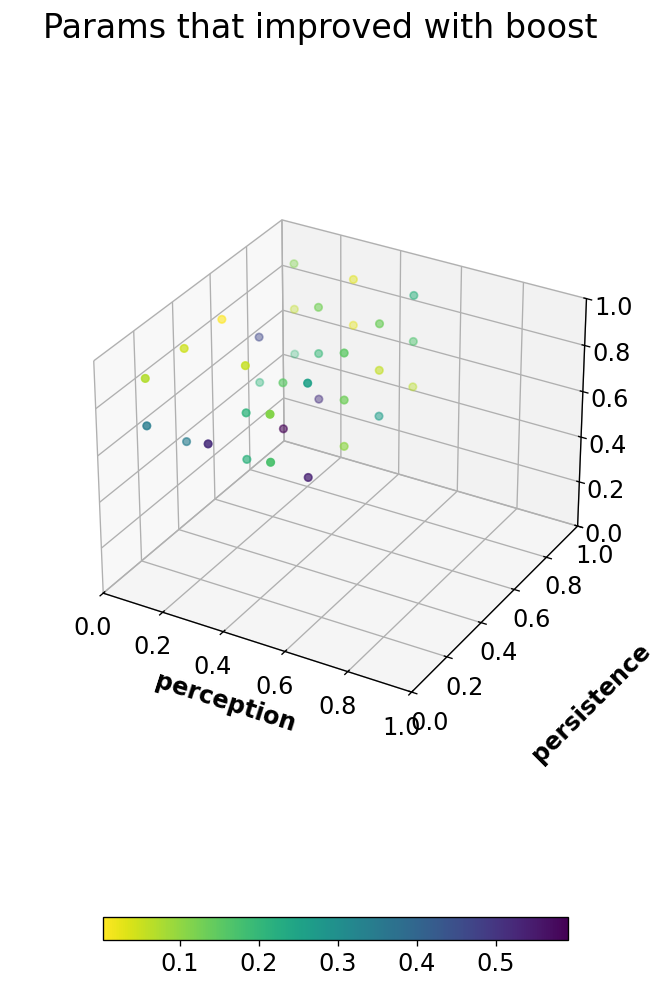

In [34]:
fig = plt.figure(figsize=(10, 10), dpi=120)
ax = fig.add_subplot(1, 1, 1, projection="3d")

coordinates = []
best_improvement = []

for params, row in improvement_df[
    ["perception", "persistence", "coordination", "improvement"]
].groupby(["perception", "persistence", "coordination"]):
    coordinates.append(params)
    best_improvement.append(row["improvement"].max())

all_nan_count = 0


for params, row in results_df[
    ["perception", "persistence", "coordination", "success_steps"]
].groupby(["perception", "persistence", "coordination"]):
    # if np.all(np.isnan(row["success_steps"])):
    all_nan_count += 1

print(all_nan_count)


x, y, z = zip(*coordinates)

plot = plot_params_3d(
    ax,
    x,
    y,
    z,
    # title=f"Best params, boost={boost_value}",
    c=best_improvement,
    s=20,
)

axes = fig.axes

fig.colorbar(plot, ax=axes, shrink=0.5, location="bottom")
fig.suptitle("Params that improved with boost", size="20")

plt.show()

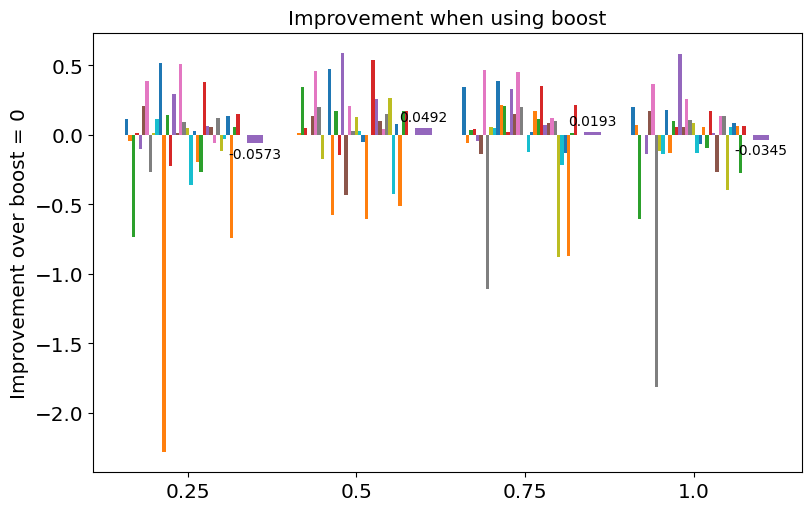

In [29]:
x = []
y_s = []


for params, row in improvement_df.groupby(
    ["perception", "persistence", "coordination", "improvement"]
):
    x.append(params[0])
    y_s.append(row["improvement"].to_numpy())


# for y in y_s:
#     ax.bar(x, y, width=0.2, color="b", align="center")

# plt.show()

boost = improvement_df["persistence_boost_value"].unique()

groupby = improvement_df.groupby(["perception", "persistence", "coordination"])

x = boost[1:]  # the label locations
width = 0.005  # the width of the bars
multiplier = -len(groupby) / 2

fig, ax = plt.subplots(layout="constrained")

for params, row in groupby:
    improvement = row["improvement"].to_numpy()[1:]

    offset = width * multiplier
    rects = ax.bar(x + offset, improvement, width)
    multiplier += 1

mean = (
    improvement_df.groupby(["persistence_boost_value"]).mean()["improvement"].to_numpy()
)
mean = np.round(mean, 4)

improvement = row["improvement"].to_numpy()[1:]

offset += width * 5
rects = ax.bar(x + offset, mean[1:], width * 5)
ax.bar_label(rects, padding=3)


ax.set_ylabel("Improvement over boost = 0")
ax.set_title("Improvement when using boost")
ax.set_xticks(x + width, boost[1:])

plt.show()

In [26]:
fig = plt.figure(figsize=(24, 10), dpi=120)

BEST_PERCENT = 15
BEST_N_POINTS = int(BEST_PERCENT / 100 * N_SAMPLES)

selected_df = [dataframes[i] for i in [0, 2, 4]]


for i, (name, df) in enumerate(selected_df):
    boost_value = np.round(int(name[-3:]) / 100, 2)

    points = (
        df.sort_values("success_steps")
        .head(BEST_N_POINTS)[
            ["perception", "persistence", "coordination", "success_steps"]
        ]
        .to_numpy()
    )

    ax = fig.add_subplot(1, N_POINTS, i + 1, projection="3d")

    x, y, z, target = zip(*points)

    plot = plot_params_3d(
        ax,
        x,
        y,
        z,
        title=f"Best params, boost={boost_value}",
        c=target,
        s=20,
        vmin=0,
        vmax=1 / 8 * ITERATIONS,
    )

axes = fig.axes

fig.colorbar(plot, ax=axes, shrink=0.67, location="bottom")
fig.suptitle(f"Best {BEST_PERCENT}% runs", size="20")

plt.show()

NameError: name 'N_SAMPLES' is not defined

<Figure size 2880x1200 with 0 Axes>

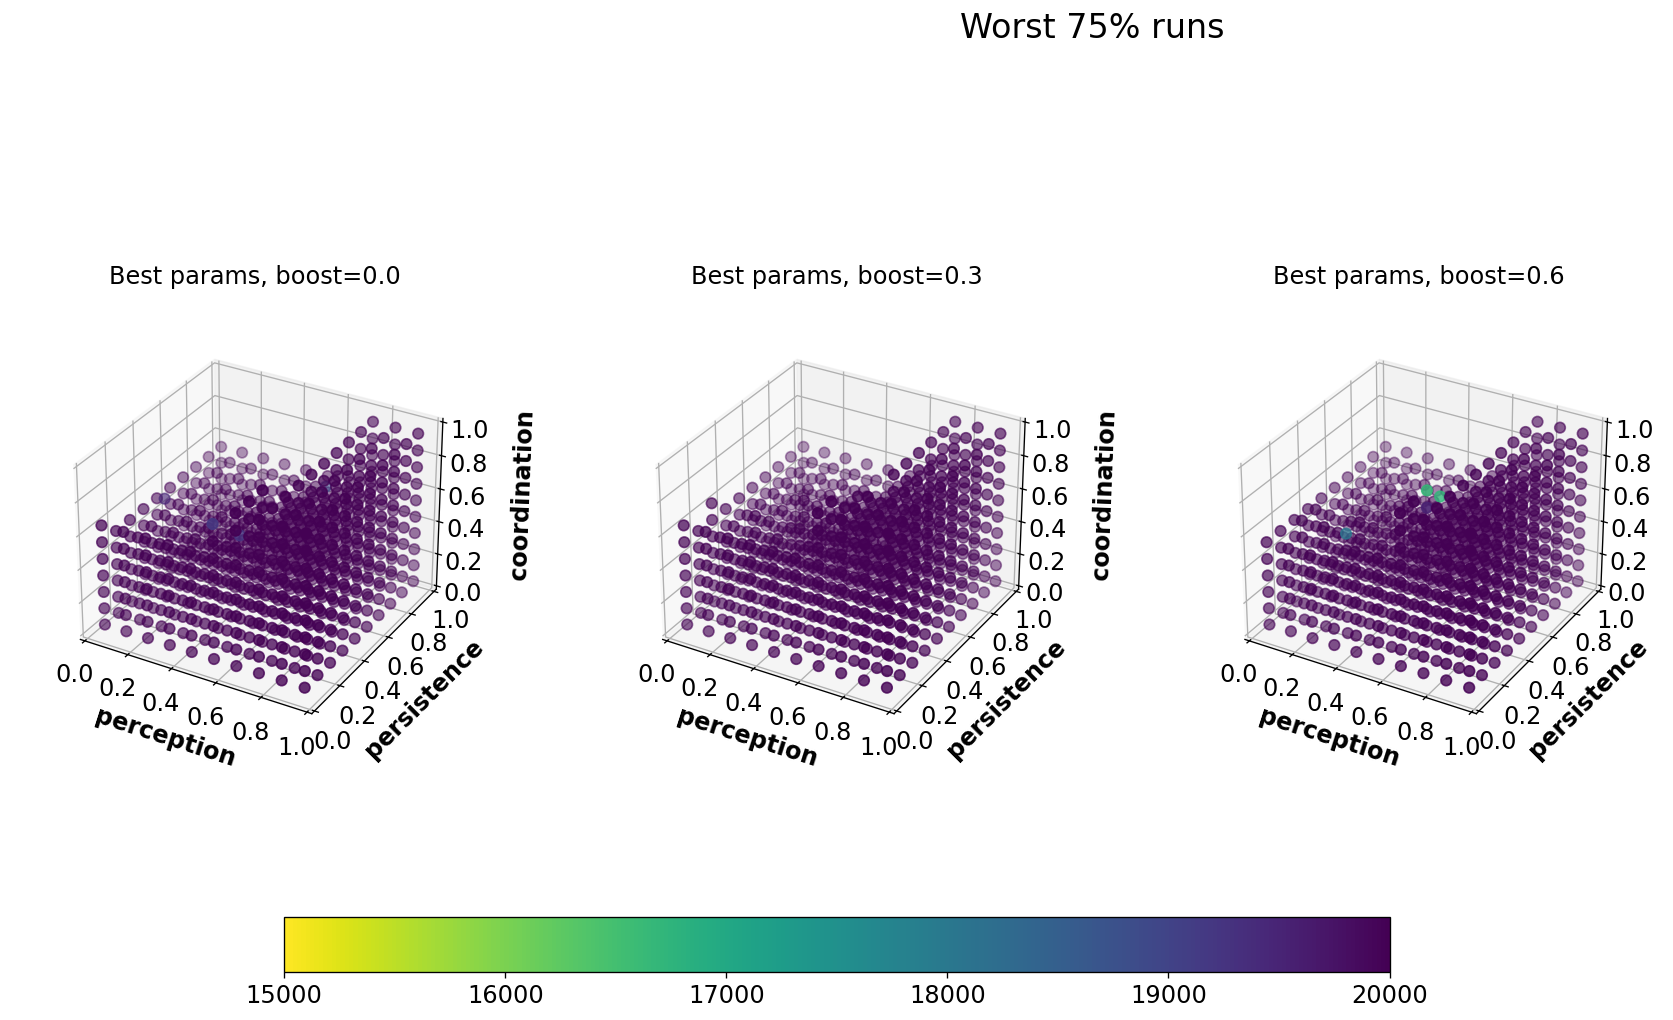

In [156]:
fig = plt.figure(figsize=(24, 10), dpi=120)

LAST_PERCENT = 75
LAST_N_POINTS = int(LAST_PERCENT / 100 * N_SAMPLES)

for i, (name, df) in enumerate(selected_df):
    boost_value = np.round(int(name[-3:]) / 100, 2)

    df["success_steps"] = df["success_steps"].fillna(ITERATIONS)

    points = (
        df.sort_values("success_steps")
        .tail(LAST_N_POINTS)[
            ["perception", "persistence", "coordination", "success_steps"]
        ]
        .to_numpy()
    )

    ax = fig.add_subplot(1, N_POINTS, i + 1, projection="3d")

    x, y, z, target = zip(*points)

    plot = plot_params_3d(
        ax,
        x,
        y,
        z,
        title=f"Best params, boost={boost_value}",
        c=target,
        vmin=3 / 4 * ITERATIONS,
        vmax=ITERATIONS,
    )

axes = fig.axes

cbar = fig.colorbar(plot, ax=axes, shrink=0.67, location="bottom")
fig.suptitle(f"Worst {LAST_PERCENT}% runs", size="20")
plt.show()

/var/folders/5f/kqrh3s354fl8g41k0s312pgh0000gn/T/ipykernel_14598/1418142149.py:10: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plot = ax.scatter3D(x, y, z, cmap=plt.get_cmap("viridis_r"), s=s, **kwargs)
/var/folders/5f/kqrh3s354fl8g41k0s312pgh0000gn/T/ipykernel_14598/1418142149.py:10: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plot = ax.scatter3D(x, y, z, cmap=plt.get_cmap("viridis_r"), s=s, **kwargs)


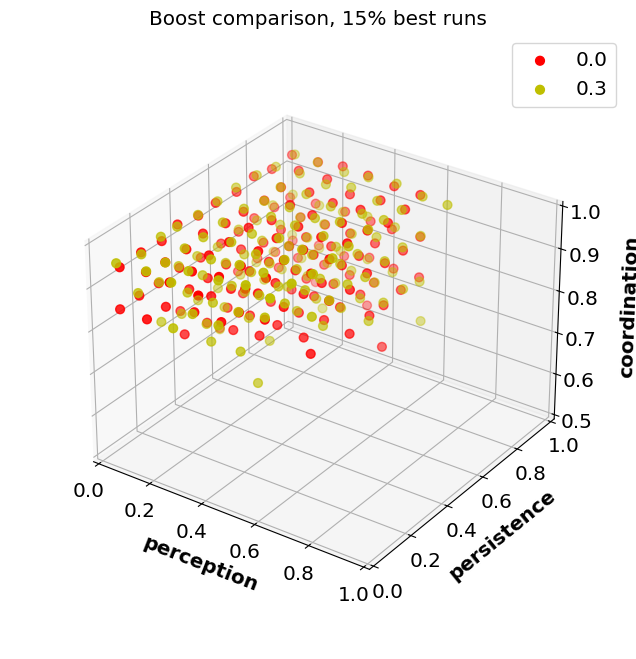

In [122]:
selected_df = [dataframes[i] for i in [0, 2]]
colors = ["r", "y", "b"]

JITTER = 0.008

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(projection="3d")

for i, (name, df) in enumerate(selected_df):
    boost_value = np.round(int(name[-3:]) / 100, 2)

    points = (
        df.sort_values("success_steps")
        .head(BEST_N_POINTS)[["perception", "persistence", "coordination"]]
        .to_numpy()
    )

    x, y, z = zip(*points)

    x += np.random.uniform(-JITTER, JITTER, len(x))
    y += np.random.uniform(-JITTER, JITTER, len(y))
    z += np.random.uniform(-JITTER, JITTER, len(z))

    c = [colors[i] for _ in range(len(x))]

    plot = plot_params_3d(ax, x, y, z, coord_lim=[0.5, 1], color=c)
    plot.set_label(boost_value)

ax.set_title(f"Boost comparison, {BEST_PERCENT}% best runs")
ax.legend()
ax.view_init(30, -55)

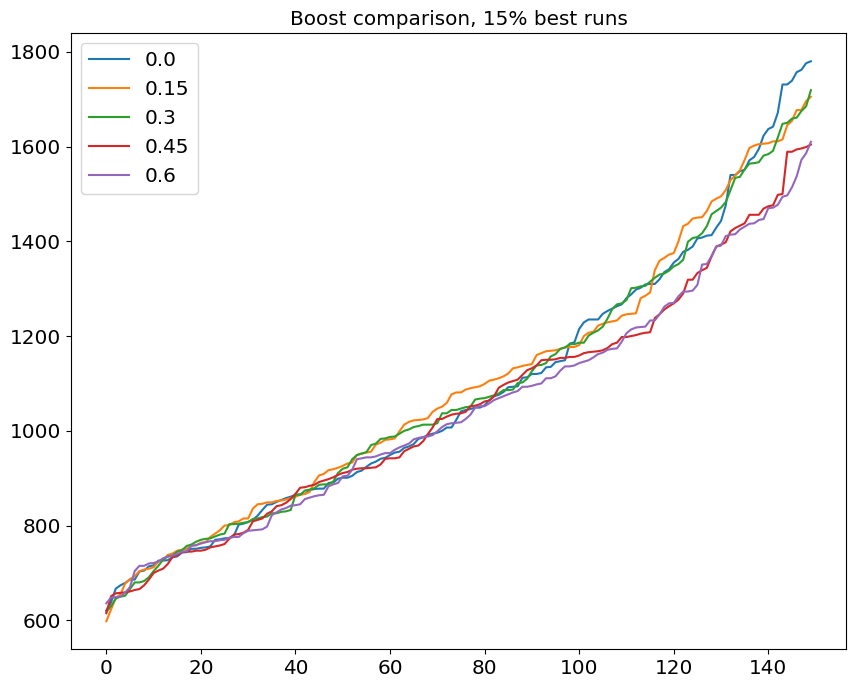

In [123]:
selected_df = [dataframes[i] for i in [0, 1, 2, 3, 4]]

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot()

for i, (name, df) in enumerate(selected_df):
    boost_value = np.round(int(name[-3:]) / 100, 2)

    points = (
        df.sort_values("success_steps")
        .head(BEST_N_POINTS)[["success_steps"]]
        .to_numpy()
    )

    plot = ax.plot(np.arange(len(points)), points, label=boost_value)

ax.set_title(f"Boost comparison, {BEST_PERCENT}% best runs")
ax.legend()

### See in how many cases, the increase in boost value resulted in better results

In [33]:
boost_values = results_df["persistence_boost_value"].unique()[1:]
selected_df = [
    results_df[results_df["persistence_boost_value"] == bst] for bst in boost_values
]
baseline_df = results_df[results_df["persistence_boost_value"] == 0]

index = [10, 20, 50, 100]

plot_map = {0.0: []}

for i, df in enumerate(selected_df):
    [boost_value] = df["persistence_boost_value"].unique()
    plot_map[boost_value] = []

index = ["perception", "persistence", "coordination"]

for n_best_points in index:
    boost_cmp_df = baseline_df.sort_values("success_steps").head(n_best_points)[
        ["success_steps"]
    ]

    boost_cmp_df.set_index(index)

    plot_map[0.0].append(np.average(boost_cmp_df["success_steps"]))

    for i, df in enumerate(selected_df):
        [boost_value] = df["persistence_boost_value"].unique()

        boost_cmp_df[name] = df.loc[
            baseline_df.index[["perception", "persistence", "coordination"]]
        ]["success_steps"]

        better_runs = len(
            boost_cmp_df[boost_cmp_df[name] > boost_cmp_df["success_steps"]]
        )
        plot_map[boost_value].append(np.average(boost_cmp_df[name]))

print(plot_map)


axis_x = []
success_steps = []

successful_results_df = results_df[results_df["success_steps"].notnull()]

for n_best_points in index:
    for boost_value, row in results_df.groupby(by="persistence_boost_value"):
        # axis_x.append(np.round(boost_value, 3))

        plot_map[0.0].append(np.average(boost_cmp_df["success_steps"]))

        success_steps.append(row["success_steps"].mean())


# f, ax1 = plt.subplots(figsize=(8, 4))
# ax1.bar(
#     axis_x,
#     success_steps,
#     width=0.08,
# )
# ax1.set_xlabel("Boost value")
# ax1.set_ylabel("Success steps")
# ax1.set_title("Persistence boost ratio")
# ax1.set_ylim(
#     bottom=min(success_steps) - 100,
#     top=max(success_steps) + 100,
# )
# ax1.set_xticks(axis_x)


plot_df = pd.DataFrame(plot_map, index=index)
ax = plot_df.plot.bar(rot=0)
plt.legend(bbox_to_anchor=(-0.1, 1))

IndexError: positional indexers are out-of-bounds

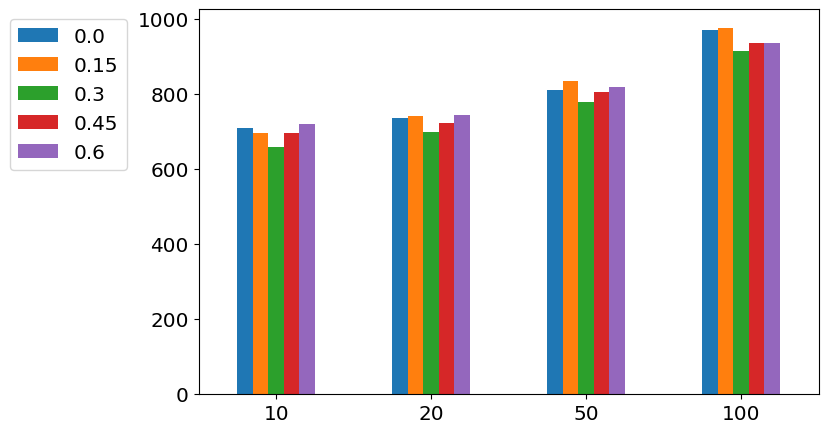

In [50]:
selected_df = [dataframes[i] for i in [0, 1, 2]]
baseline_df = dataframes[0][1]

index = [10, 20, 50, 100]

for i, (name, df) in enumerate(selected_df):
    boost_value = np.round(int(name[-3:]) / 100, 2)
    plot_map[boost_value] = []

for n_best_points in index:
    boost_cmp_df = df.sort_values("success_steps").head(n_best_points)[
        ["success_steps"]
    ]

    for i, (name, df) in enumerate(selected_df):
        boost_value = np.round(int(name[-3:]) / 100, 2)

        boost_cmp_df[name] = df.iloc[baseline_df.index]["success_steps"]

        better_runs = boost_cmp_df[
            boost_cmp_df[name] > boost_cmp_df["success_steps"]
        ].shape[0]
        plot_map[boost_value].append(np.average(boost_cmp_df[name]))


plot_df = pd.DataFrame(plot_map, index=index)
ax = plot_df.plot.bar(rot=0)
plt.legend(bbox_to_anchor=(-0.1, 1))

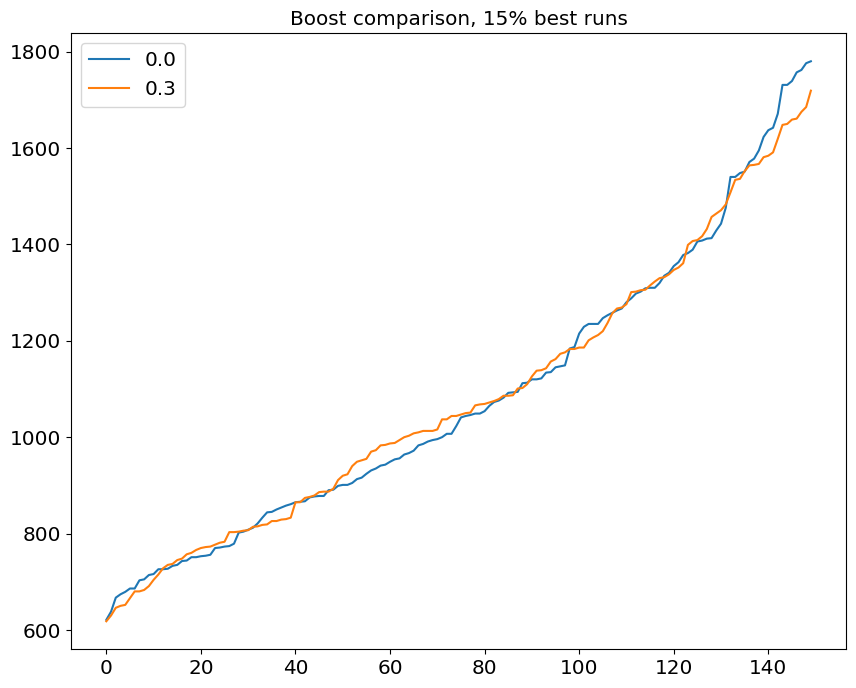

In [51]:
selected_df = [dataframes[i] for i in [0, 2]]

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot()

for i, (name, df) in enumerate(selected_df):
    boost_value = np.round(int(name[-3:]) / 100, 2)

    points = (
        df.sort_values("success_steps")
        .head(BEST_N_POINTS)[["success_steps"]]
        .to_numpy()
    )

    plot = ax.plot(np.arange(len(points)), points, label=boost_value)

ax.set_title(f"Boost comparison, {BEST_PERCENT}% best runs")
ax.legend()

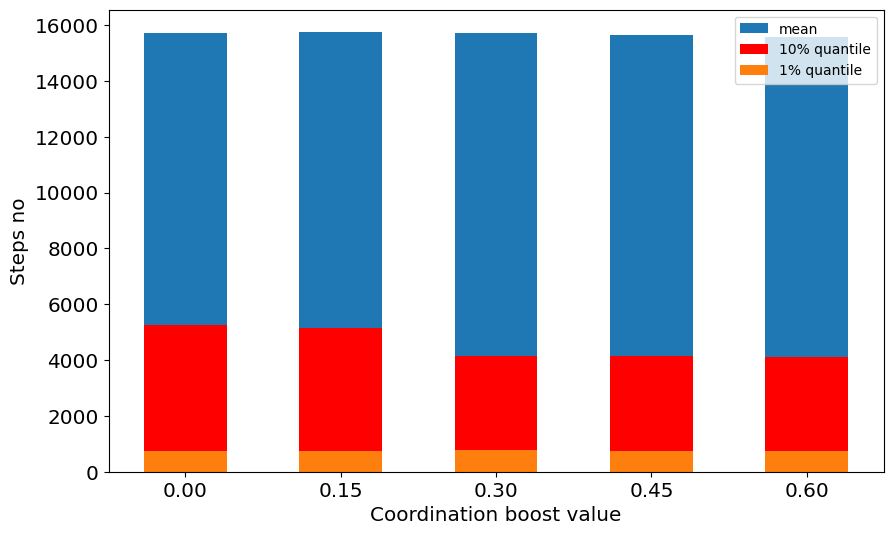

In [52]:
axis_x = []
y_mean = []
y_quantiles = np.zeros(shape=(len(dataframes), 99))

for i, (name, df) in enumerate(dataframes):
    axis_x.append(np.round(int(name[-3:]) / 100, 3))

    goal = df["success_steps"]
    goal = goal.fillna(ITERATIONS)

    y_mean.append(statistics.mean(goal))
    y_quantiles[i] = statistics.quantiles(goal, n=100)


f, ax1 = plt.subplots(figsize=(10, 6))
ax1.bar(axis_x, y_mean, width=0.08, label="mean")
ax1.set_xlabel("Coordination boost value")
ax1.set_ylabel("Steps no")

ax2 = plt.subplot()
ax2.bar(axis_x, y_quantiles[:, 20], width=0.08, label="10% quantile", color="r")
ax2.set_xticks(axis_x)

ax3 = plt.subplot()
ax3.bar(axis_x, y_quantiles[:, 1], width=0.08, label="1% quantile")
ax3.set_xticks(axis_x)
ax3.legend(prop={"size": 10})

results/basic_01_09_3/basic




perception  persistence  coordination  repeats  iterations  \
8          0.1          0.9           0.9        4       20000   
17         0.5          0.9           0.9        4       20000   
5          0.1          0.5           0.9        4       20000   
14         0.5          0.5           0.9        4       20000   
2          0.1          0.1           0.9        4       20000   
11         0.5          0.1           0.9        4       20000   

                                              actions  \
8   {'LookForToy': 8753, 'EvaluateToy': 18151, 'Cr...   
17  {'LookForToy': 8632, 'EvaluateToy': 18120, 'Cr...   
5   {'LookForToy': 8824, 'EvaluateToy': 19036, 'Cr...   
14  {'LookForToy': 8991, 'EvaluateToy': 19044, 'Cr...   
2   {'LookForToy': 9190, 'EvaluateToy': 19738, 'Cr...   
11  {'LookForToy': 8891, 'EvaluateToy': 19353, 'Cr...   

                                           infant_pos  success_steps  
8   ([[50.0, 50.0], [50.0, 50.0], [50.0, 50.0], [5...          739.0  
17  ([[50.0, 50.0], [50.0, 50.0], [50.0, 50.0], [5...          748.0  
5   ([[50.0, 50.0], [50.0, 50.0], [50.0, 50.0], [5...          936.0  
14  ([[50.0, 50.0], [50.0, 50.0], [50.0, 50.0], [5...          997.0  
2   ([[50.0, 50.0], [50.0, 50.0], [50.0, 50.0], [5...         1305.0  
11  ([[50.0, 50.0], [50.0, 50.0], [50.0, 50.0], [5...         2125.0

success runs 6
Best: 739.0 Mean: 15809.25925925926


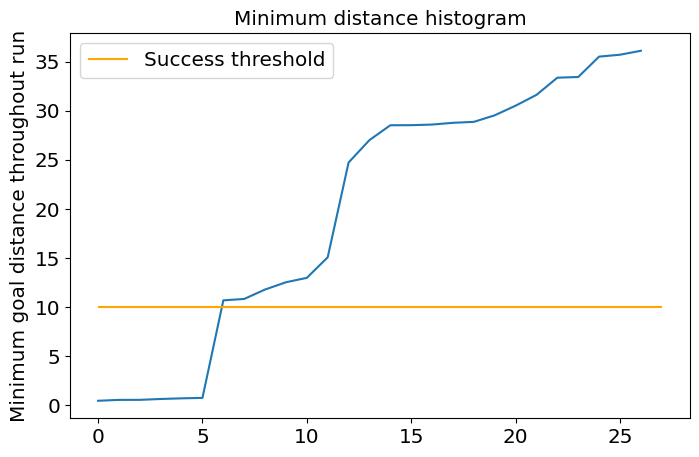

9


AssertionError: 

In [12]:
from statistics import mean

GRID_SIZE = 10


def draw_min_dist_histogram(df):
    y = (
        df.apply(lambda row: np.min(row["goal_distance"]), axis=1)
        .sort_values()
        .to_numpy()
    )

    fig, ax = plt.subplots()
    ax.plot(y)
    ax.set_title("Minimum distance histogram")
    ax.set_ylabel("Minimum goal distance throughout run")
    ax.hlines(
        y=SUCCESS_DIST, xmin=0, xmax=len(y), color="orange", label="Success threshold"
    )
    ax.legend()
    plt.show()


def get_heatmap_data(paramx, paramy, df):
    heatmap_data = np.zeros(shape=(GRID_SIZE, GRID_SIZE))
    # paramx = "perception"
    # paramy = "persistence"

    grouped = df_fill_na.groupby([paramy, paramx])
    # display(grouped.mean())

    # display(df_fill_na.sort_values(by=[paramx, paramy]))

    print(len(grouped))

    labelsx = []
    labelsy = []

    for idx, (name, group) in enumerate(grouped):
        # print(idx, idx // 5)

        value = group["success_steps"].mean()

        (p1, p2) = name

        if idx % GRID_SIZE == 0:
            labelsx.append(np.round(p1, 4))

        if idx // GRID_SIZE == 0:
            labelsy.append(np.round(p2, 4))

        heatmap_data[idx // GRID_SIZE, idx % GRID_SIZE] = value

    return labelsx, labelsy, heatmap_data


SUCCESS_DIST = 10

for name, df in dataframes:
    print(f"{name}\n\n")

    df["success_steps"] = df.apply(
        lambda row: get_success_step(row["goal_distance"], SUCCESS_DIST), axis=1
    )

    df_non_na = df[df["success_steps"].notnull()].sort_values(by=["success_steps"])
    display(
        df_non_na.head(10).drop(columns=["parent_tps", "infant_tps", "goal_distance"])
    )
    print(f"success runs {len(df_non_na)}")

    goal = df["success_steps"]
    goal = goal.fillna(ITERATIONS)
    best_result = sorted(goal)[0]

    print(f"Best: {best_result} Mean: {mean(goal)}")

    draw_min_dist_histogram(df)

    df_fill_na = df
    df_fill_na[["success_steps"]] = df[["success_steps"]].fillna(ITERATIONS)
    # display(df_fill_na)
    # grouped = df_fill_na.groupby(["perception", "persistence"])

    for paramx, paramy in [
        ("perception", "persistence"),
        ("perception", "coordination"),
        ("persistence", "coordination"),
    ]:
        labelsx, labelsy, heatmap_data = get_heatmap_data(paramx, paramy, df_fill_na)

        create_heatmap(
            heatmap_data,
            paramx,
            paramy,
            labelsx,
            labelsy,
            invert_colors=True,
            figsize=(8, 8),
        )

## Which boost value yielded best results ?

### Successful runs

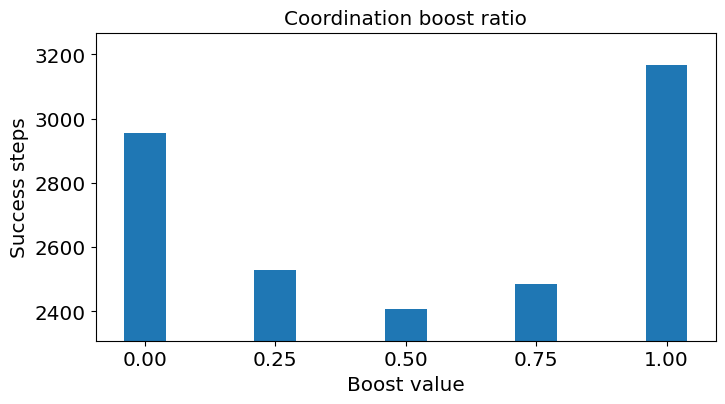

In [30]:
axis_x = []
success_steps = []

successful_results_df = results_df

for boost_value, row in successful_results_df.groupby(by="coordination_boost_value"):
    axis_x.append(np.round(boost_value, 3))
    success_steps.append(row["success_steps"].mean())

f, ax1 = plt.subplots(figsize=(8, 4))
ax1.bar(
    axis_x,
    success_steps,
    width=0.08,
)
ax1.set_xlabel("Boost value")
ax1.set_ylabel("Success steps")
ax1.set_title("Coordination boost ratio")
ax1.set_ylim(
    bottom=min(success_steps) - 100,
    top=max(success_steps) + 100,
)
ax1.set_xticks(axis_x)

### Try top N runs

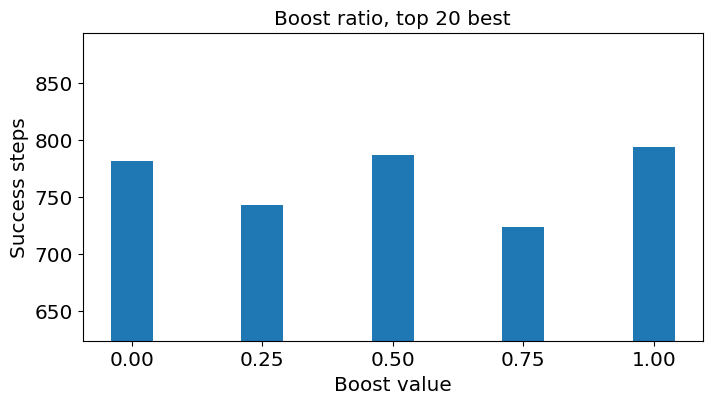

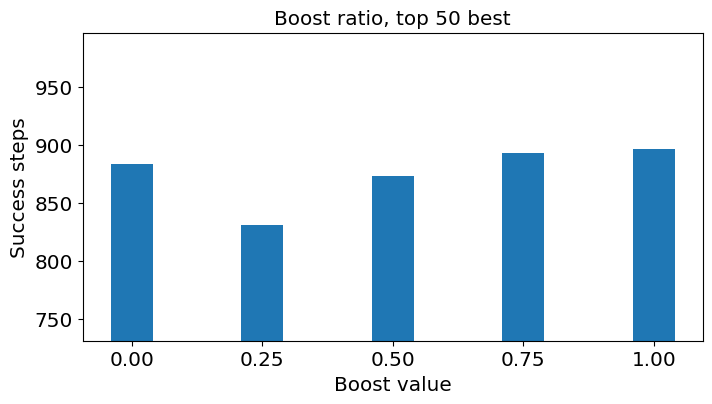

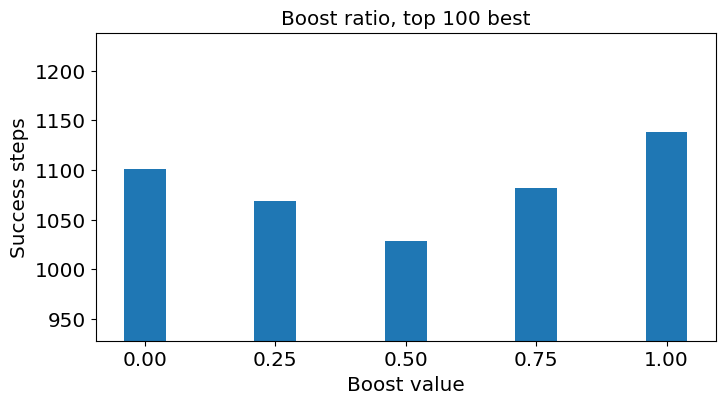

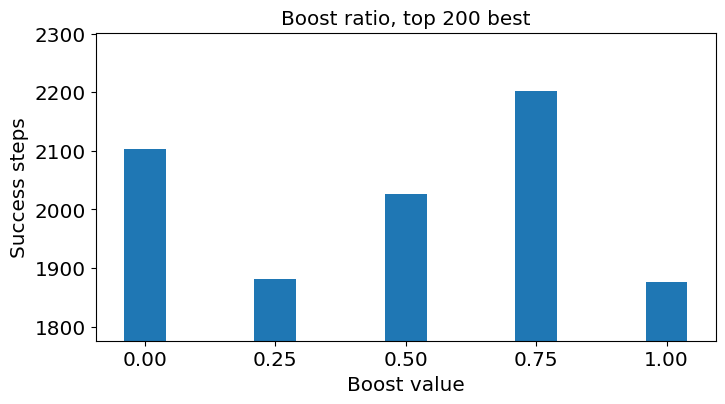

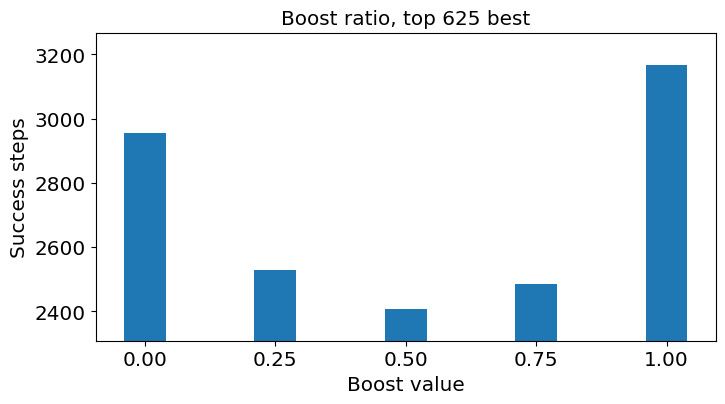

In [31]:
for n_best in [20, 50, 100, 200, len(results_df["success_steps"].notnull())]:
    successful_results_df = results_df.sort_values("success_steps").head(n_best)

    axis_x = []
    success_steps = []

    for boost_value, row in successful_results_df.groupby(
        by="coordination_boost_value"
    ):
        axis_x.append(np.round(boost_value, 3))
        success_steps.append(row["success_steps"].mean())

    f, ax1 = plt.subplots(figsize=(8, 4))
    ax1.bar(
        axis_x,
        success_steps,
        width=0.08,
    )
    ax1.set_xlabel("Boost value")
    ax1.set_ylabel("Success steps")
    ax1.set_title(f"Boost ratio, top {n_best} best")
    ax1.set_ylim(
        bottom=min(success_steps) - 100,
        top=max(success_steps) + 100,
    )
    ax1.set_xticks(axis_x)

## Evaluate position trails

In [17]:
ordered_runs = results_df.sort_values("success_steps")
display(ordered_runs.head(5))
display(ordered_runs.tail(5))

perception  persistence  coordination  persistence_boost_value  \
52         0.5          0.9           0.9                      0.5   
51         0.5          0.9           0.9                      0.0   
25         0.1          0.9           0.9                      0.5   
24         0.1          0.9           0.9                      0.0   
53         0.5          0.9           0.9                      1.0   

    coordination_boost_value  success_steps  
52                       0.5          742.0  
51                       0.0          744.0  
25                       0.5          749.0  
24                       0.0          762.0  
53                       1.0          768.0

perception  persistence  coordination  persistence_boost_value  \
76         0.9          0.9           0.5                      0.5   
77         0.9          0.9           0.5                      1.0   
78         0.9          0.9           0.9                      0.0   
79         0.9          0.9           0.9                      0.5   
80         0.9          0.9           0.9                      1.0   

    coordination_boost_value  success_steps  
76                       0.5            NaN  
77                       1.0            NaN  
78                       0.0            NaN  
79                       0.5            NaN  
80                       1.0            NaN

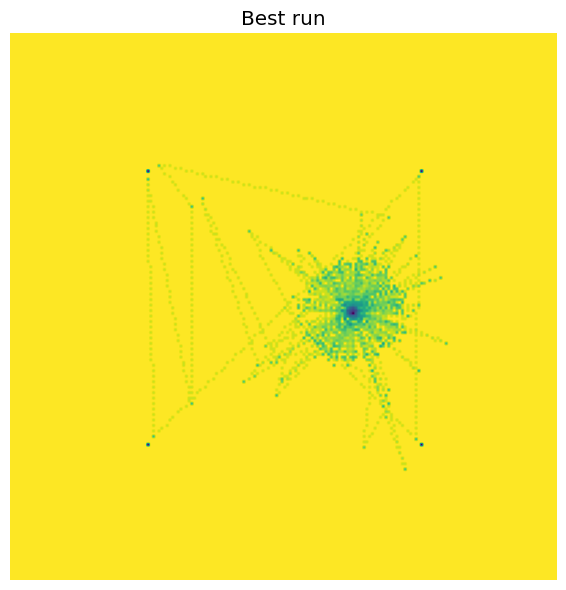

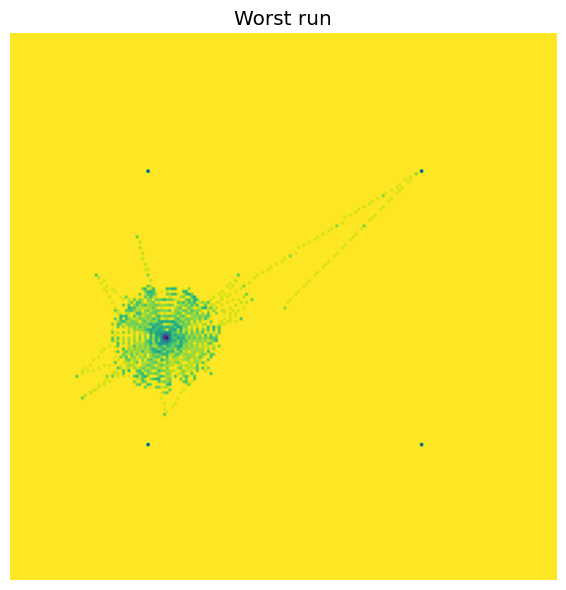

In [14]:
def create_run_position_heatmap(run_index, grid_size, title=""):
    positions = results[run_index][1].infant_positions
    positions = np.array(positions)

    pos_x = positions[:, 0]
    pos_y = positions[:, 1]

    heatmap_data = np.zeros(shape=(grid_size, grid_size))

    bins = np.linspace(0, 100, grid_size + 1)[1:-1]
    indices_x = np.digitize(pos_x, bins)
    indices_y = np.digitize(pos_y, bins)

    indices = zip(indices_x, indices_y)

    for idx in indices:
        heatmap_data[idx] += 1

    toy_value = np.max(heatmap_data)

    for t_x in [25, 75]:
        for t_y in [25, 75]:
            idx_x = np.digitize([t_x], bins)
            idx_y = np.digitize([t_y], bins)

            heatmap_data[idx_x, idx_y] += toy_value

    heatmap_data = np.log1p(heatmap_data)

    create_heatmap(
        heatmap_data,
        param1="x",
        param2="y",
        invert_colors=True,
        show_text=False,
        title=title,
        figsize=(6, 6),
    )


create_run_position_heatmap(ordered_runs.index[0], 200, title="Best run")
create_run_position_heatmap(ordered_runs.index[-1], 200, title="Worst run")

## Boost frequency - how often we get boost

In [14]:
def get_boost_count(index):
    if index % 100 == 0:
        print(index)
    results = load_partial(index).values()

    boost_events = np.array([r["boosts"] for r in results])

    return [
        np.average(np.array(boost_events == name, dtype="int"), axis=0)
        for name in boost_names
    ]

    return


boost_names = [
    "persistence",
    "no_persistence",
    "coordination",
    "no_coordination",
]

new_column_names = [f"{boost}_boost_count" for boost in boost_names]

# if not "boost_freq_df" in locals():
boost_freq_df = results_df

boost_freq_df[new_column_names] = [
    get_boost_count(index) for index in boost_freq_df.index
]

display(boost_freq_df)


for boost_name in ["persistence", "coordination"]:
    a = np.array(boost_freq_df[f"{boost_name}_boost_count"].to_list()).sum(axis=1)
    b = np.array(boost_freq_df[f"no_{boost_name}_boost_count"].to_list()).sum(axis=1)

    boost_freq_df[f"{boost_name}_boost_ratio"] = a / (a + b)

display(boost_freq_df.sort_values("persistence_boost_ratio", ascending=False).head())
display(boost_freq_df.sort_values("coordination_boost_ratio", ascending=False).tail())

0


perception  persistence  coordination  persistence_boost_value  \
0          0.1          0.1           0.1                      0.0   
1          0.1          0.1           0.1                      0.5   
2          0.1          0.1           0.1                      1.0   
3          0.1          0.1           0.5                      0.0   
4          0.1          0.1           0.5                      0.5   
..         ...          ...           ...                      ...   
76         0.9          0.9           0.5                      0.5   
77         0.9          0.9           0.5                      1.0   
78         0.9          0.9           0.9                      0.0   
79         0.9          0.9           0.9                      0.5   
80         0.9          0.9           0.9                      1.0   

    coordination_boost_value  success_steps  \
0                        0.0            NaN   
1                        0.5            NaN   
2                        1.0            NaN   
3                        0.0            NaN   
4                        0.5            NaN   
..                       ...            ...   
76                       0.5            NaN   
77                       1.0            NaN   
78                       0.0            NaN   
79                       0.5            NaN   
80                       1.0            NaN   

                              persistence_boost_count  \
0   [0.0, 0.0, 0.0, 0.18181818181818182, 0.0909090...   
1   [0.0, 0.0, 0.0, 0.18181818181818182, 0.0, 0.0,...   
2   [0.0, 0.0, 0.0, 0.18181818181818182, 0.0909090...   
3   [0.0, 0.0, 0.0, 0.18181818181818182, 0.0, 0.0,...   
4   [0.0, 0.0, 0.0, 0.09090909090909091, 0.0909090...   
..                                                ...   
76  [0.0, 0.0, 0.09090909090909091, 0.090909090909...   
77  [0.0, 0.0, 0.0, 0.09090909090909091, 0.1818181...   
78  [0.0, 0.0, 0.0, 0.18181818181818182, 0.1818181...   
79  [0.0, 0.0, 0.09090909090909091, 0.0, 0.0909090...   
80  [0.0, 0.0, 0.0, 0.18181818181818182, 0.0909090...   

                           no_persistence_boost_count  \
0   [0.0, 0.0, 0.0, 0.0, 0.7272727272727273, 0.0, ...   
1   [0.0, 0.0, 0.0, 0.0, 0.8181818181818182, 0.0, ...   
2   [0.0, 0.0, 0.0, 0.0, 0.7272727272727273, 0.0, ...   
3   [0.0, 0.0, 0.0, 0.0, 0.8181818181818182, 0.0, ...   
4   [0.0, 0.0, 0.0, 0.0, 0.8181818181818182, 0.0, ...   
..                                                ...   
76  [0.0, 0.0, 0.0, 0.0, 0.6363636363636364, 0.0, ...   
77  [0.0, 0.0, 0.0, 0.0, 0.7272727272727273, 0.0, ...   
78  [0.0, 0.0, 0.0, 0.0, 0.6363636363636364, 0.0, ...   
79  [0.0, 0.0, 0.0, 0.0, 0.8181818181818182, 0.0, ...   
80  [0.0, 0.0, 0.0, 0.0, 0.7272727272727273, 0.0, ...   

                             coordination_boost_count  \
0   [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
1   [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
2   [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
3   [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
4   [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
..                                                ...   
76  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
77  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
78  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
79  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
80  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                          no_coordination_boost_count  
0   [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
1   [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
2   [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
3   [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
4   [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
..                                                ...  
76  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
77  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
78  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

perception  persistence  coordination  persistence_boost_value  \
57         0.9          0.1           0.5                      0.0   
9          0.1          0.5           0.1                      0.0   
51         0.5          0.9           0.9                      0.0   
45         0.5          0.9           0.1                      0.0   
41         0.5          0.5           0.5                      1.0   

    coordination_boost_value  success_steps  \
57                       0.0            NaN   
9                        0.0            NaN   
51                       0.0          744.0   
45                       0.0            NaN   
41                       1.0         5716.0   

                              persistence_boost_count  \
57  [0.0, 0.0, 0.0, 0.09090909090909091, 0.0909090...   
9   [0.0, 0.0, 0.09090909090909091, 0.0, 0.0909090...   
51  [0.0, 0.0, 0.09090909090909091, 0.090909090909...   
45  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
41  [0.0, 0.0, 0.0, 0.0, 0.36363636363636365, 0.0,...   

                           no_persistence_boost_count  \
57  [0.0, 0.0, 0.0, 0.0, 0.8181818181818182, 0.0, ...   
9   [0.0, 0.0, 0.0, 0.0, 0.8181818181818182, 0.0, ...   
51  [0.0, 0.0, 0.0, 0.0, 0.6363636363636364, 0.0, ...   
45  [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...   
41  [0.0, 0.0, 0.0, 0.0, 0.6363636363636364, 0.0, ...   

                             coordination_boost_count  \
57  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
9   [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
51  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
45  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
41  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                          no_coordination_boost_count  \
57  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
9   [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
51  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
45  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
41  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

    persistence_boost_ratio  coordination_boost_ratio  
57                 0.302499                  0.279839  
9                  0.301918                  0.270795  
51                 0.300126                  0.279235  
45                 0.299669                  0.276629  
41                 0.299207                  0.282240

perception  persistence  coordination  persistence_boost_value  \
13         0.1          0.5           0.5                      0.5   
32         0.5          0.1           0.5                      1.0   
20         0.1          0.9           0.1                      1.0   
58         0.9          0.1           0.5                      0.5   
0          0.1          0.1           0.1                      0.0   

    coordination_boost_value  success_steps  \
13                       0.5         2867.0   
32                       1.0         9775.0   
20                       1.0            NaN   
58                       0.5            NaN   
0                        0.0            NaN   

                              persistence_boost_count  \
13  [0.0, 0.0, 0.0, 0.0, 0.09090909090909091, 0.0,...   
32  [0.0, 0.0, 0.09090909090909091, 0.0, 0.0909090...   
20  [0.0, 0.0, 0.09090909090909091, 0.181818181818...   
58  [0.0, 0.0, 0.09090909090909091, 0.090909090909...   
0   [0.0, 0.0, 0.0, 0.18181818181818182, 0.0909090...   

                           no_persistence_boost_count  \
13  [0.0, 0.0, 0.0, 0.0, 0.9090909090909091, 0.0, ...   
32  [0.0, 0.0, 0.0, 0.0, 0.8181818181818182, 0.0, ...   
20  [0.0, 0.0, 0.0, 0.0, 0.7272727272727273, 0.0, ...   
58  [0.0, 0.0, 0.0, 0.0, 0.5454545454545454, 0.0, ...   
0   [0.0, 0.0, 0.0, 0.0, 0.7272727272727273, 0.0, ...   

                             coordination_boost_count  \
13  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
32  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
20  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
58  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
0   [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                          no_coordination_boost_count  \
13  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
32  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
20  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
58  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
0   [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

    persistence_boost_ratio  coordination_boost_ratio  
13                 0.291832                  0.269997  
32                 0.288967                  0.269931  
20                 0.290798                  0.268985  
58                 0.291981                  0.268098  
0                  0.296378                  0.263236

### Display boost ratio averaged for whole run

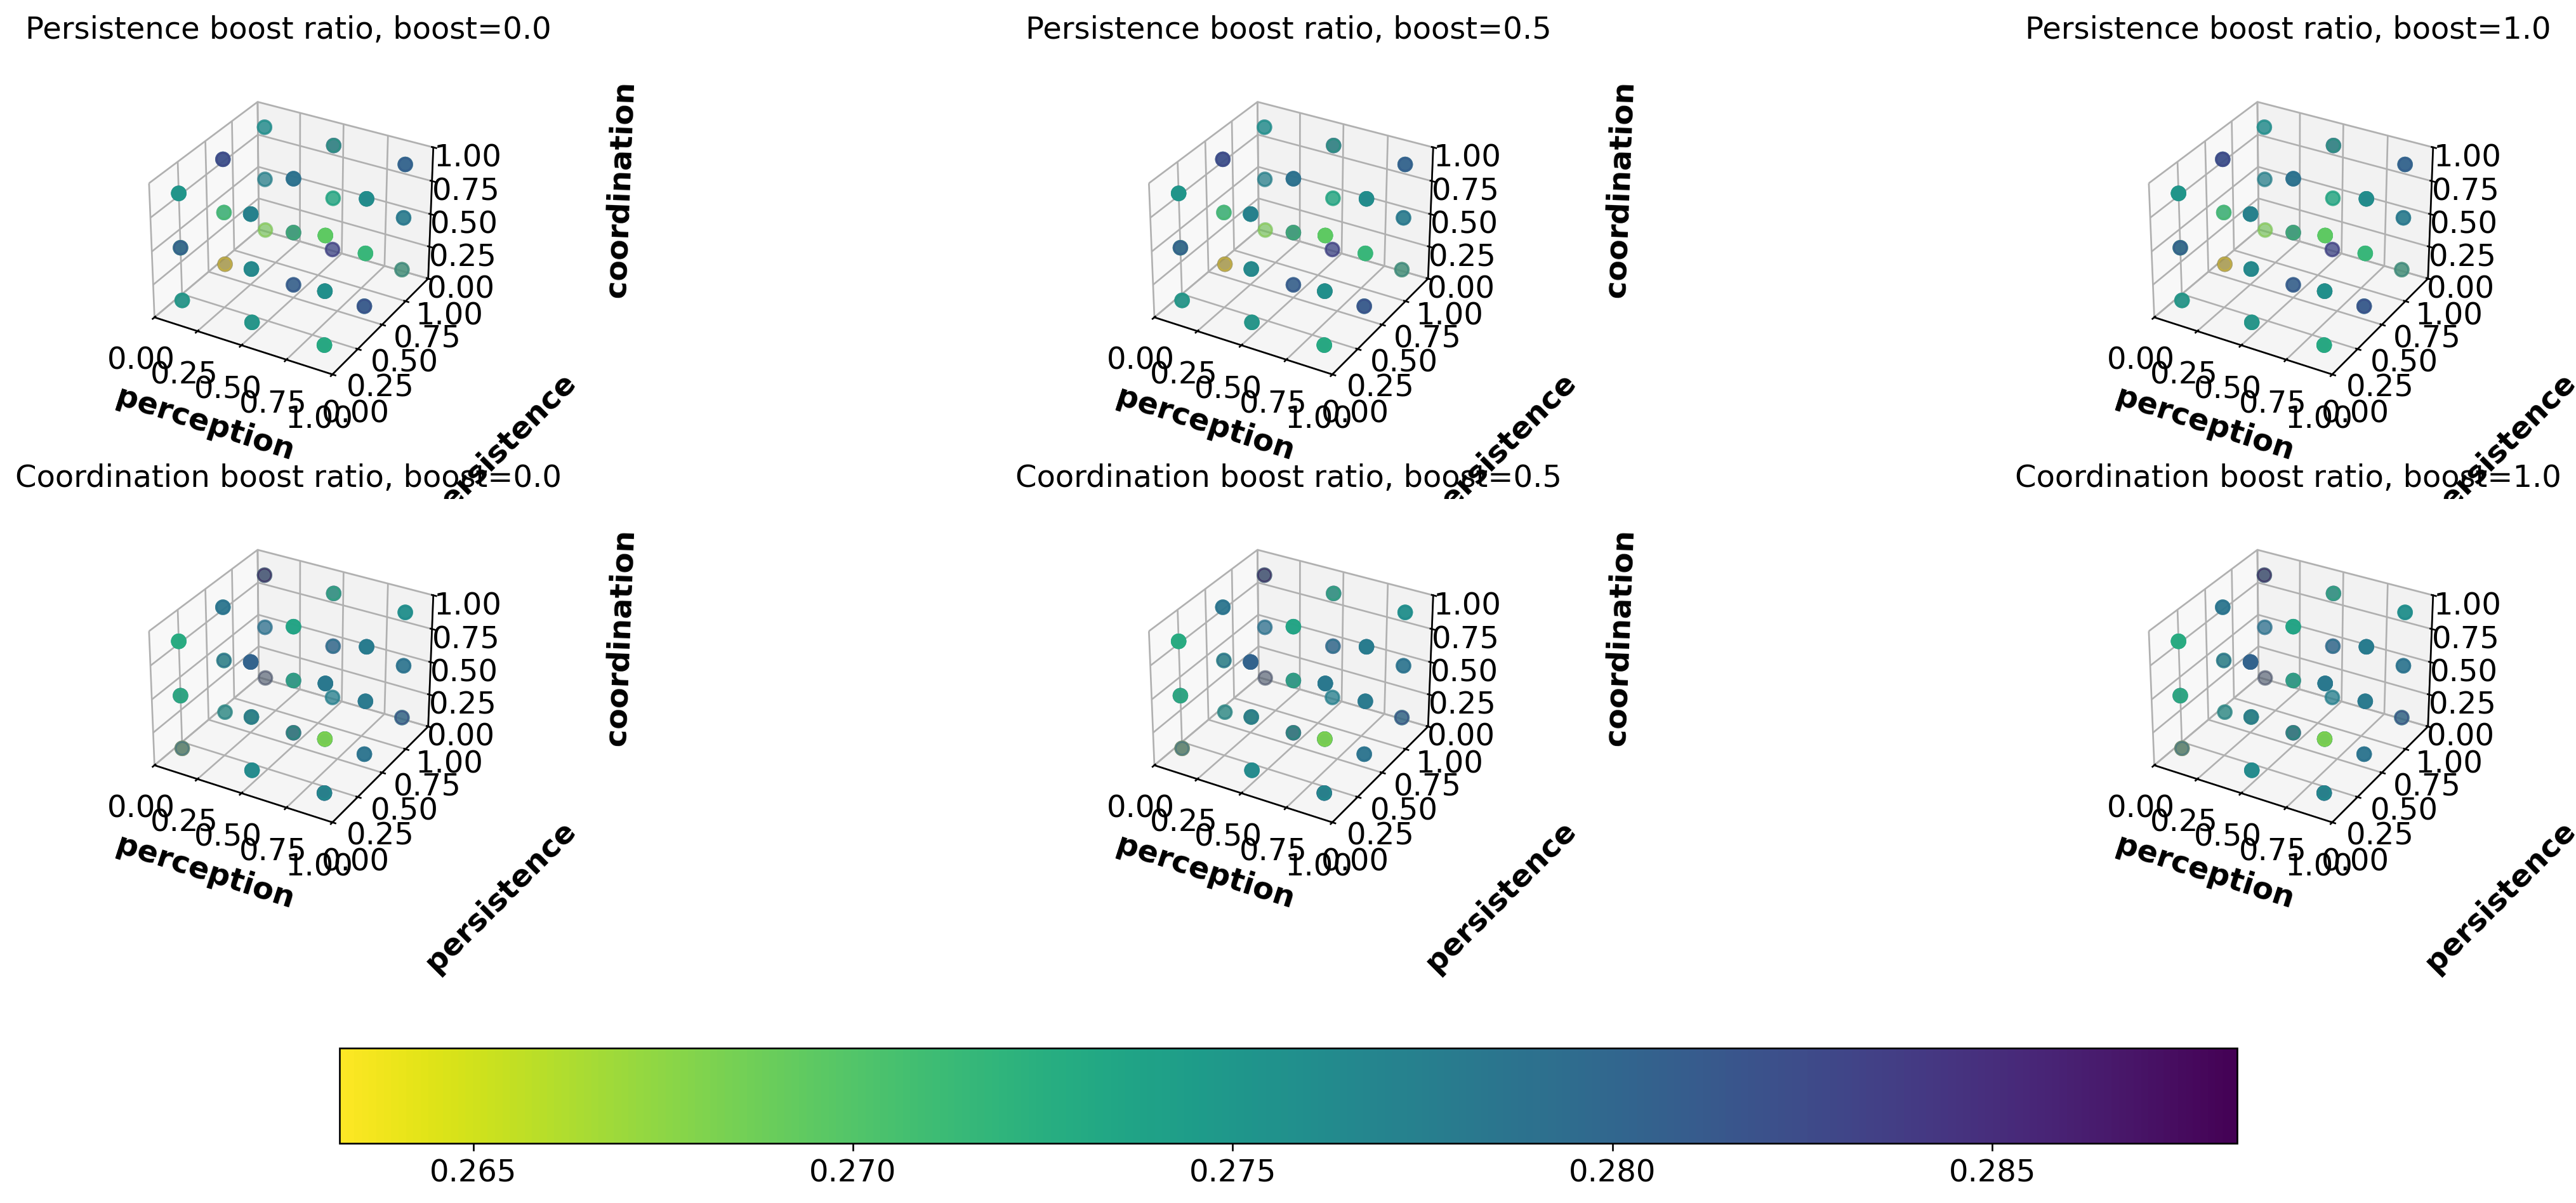

In [15]:
fig = plt.figure(figsize=(24, 10), dpi=240)

boost_values = results_df["persistence_boost_value"].unique()
N_COLS = len(boost_values)

for i, boost_value in enumerate(boost_values):
    boost_value = np.round(boost_value, 2)

    df = results_df
    df["success_steps"] = df["success_steps"].fillna(ITERATIONS)

    points = df.sort_values("success_steps")[
        [
            "perception",
            "persistence",
            "coordination",
            "persistence_boost_ratio",
            "coordination_boost_ratio",
        ]
    ].to_numpy()

    x, y, z, b_persist, b_coord = zip(*points)

    ax = fig.add_subplot(2, N_COLS, i + 1, projection="3d")

    plot = plot_params_3d(
        ax,
        x,
        y,
        z,
        title=f"Persistence boost ratio, boost={boost_value}",
        c=b_persist,
        # vmin=3 / 4 * ITERATIONS,
        # vmax=ITERATIONS,
    )

    ax = fig.add_subplot(2, N_COLS, N_COLS + i + 1, projection="3d")

    plot = plot_params_3d(
        ax,
        x,
        y,
        z,
        title=f"Coordination boost ratio, boost={boost_value}",
        c=b_coord,
        # vmin=3 / 4 * ITERATIONS,
        # vmax=ITERATIONS,
    )

axes = fig.axes

cbar = fig.colorbar(plot, ax=axes, shrink=0.67, location="bottom")
# fig.suptitle(f"Worst {LAST_PERCENT}% runs", size="20")
plt.show()

In [ ]:
for avg_steps in [20, 50, 100, 200, 500]:
    

(0.26697504439417885, 0.2884240696680533)

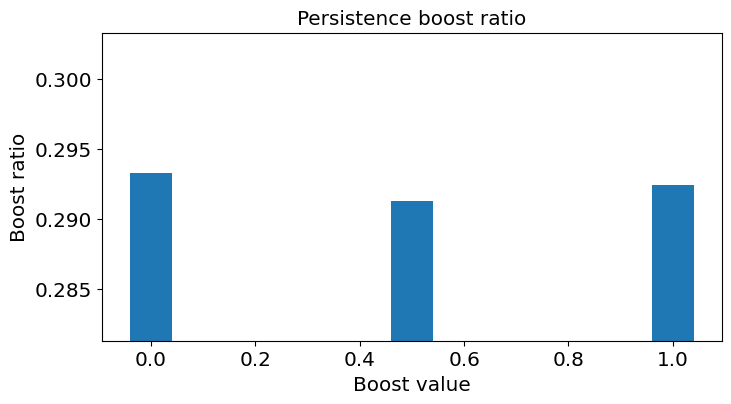

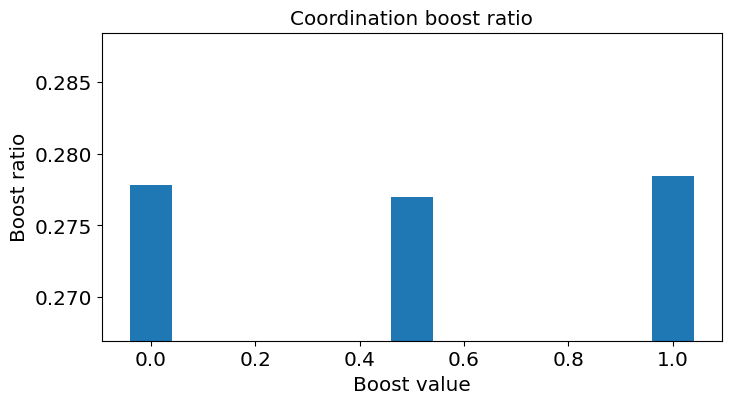

In [17]:
axis_x = []
persistence_boost_ratios = []
coordination_boost_ratios = []

for boost_value, row in results_df[
    ["persistence_boost_value", "persistence_boost_ratio", "coordination_boost_ratio"]
].groupby(by="persistence_boost_value"):
    axis_x.append(np.round(boost_value, 3))

    row = row.mean()

    persistence_boost_ratios.append(row["persistence_boost_ratio"])
    coordination_boost_ratios.append(row["coordination_boost_ratio"])


f, ax1 = plt.subplots(figsize=(8, 4))
ax1.bar(
    axis_x,
    persistence_boost_ratios,
    width=0.08,
)
ax1.set_xlabel("Boost value")
ax1.set_ylabel("Boost ratio")
ax1.set_title("Persistence boost ratio")
ax1.set_ylim(
    bottom=min(persistence_boost_ratios) - 0.01,
    top=max(persistence_boost_ratios) + 0.01,
)

f2, ax2 = plt.subplots(figsize=(8, 4))
ax2.bar(
    axis_x,
    coordination_boost_ratios,
    width=0.08,
)
ax2.set_xlabel("Boost value")
ax2.set_ylabel("Boost ratio")
ax2.set_title("Coordination boost ratio")
ax2.set_ylim(
    bottom=min(coordination_boost_ratios) - 0.01,
    top=max(coordination_boost_ratios) + 0.01,
)

(20000,)
(20000,)
(20000,)


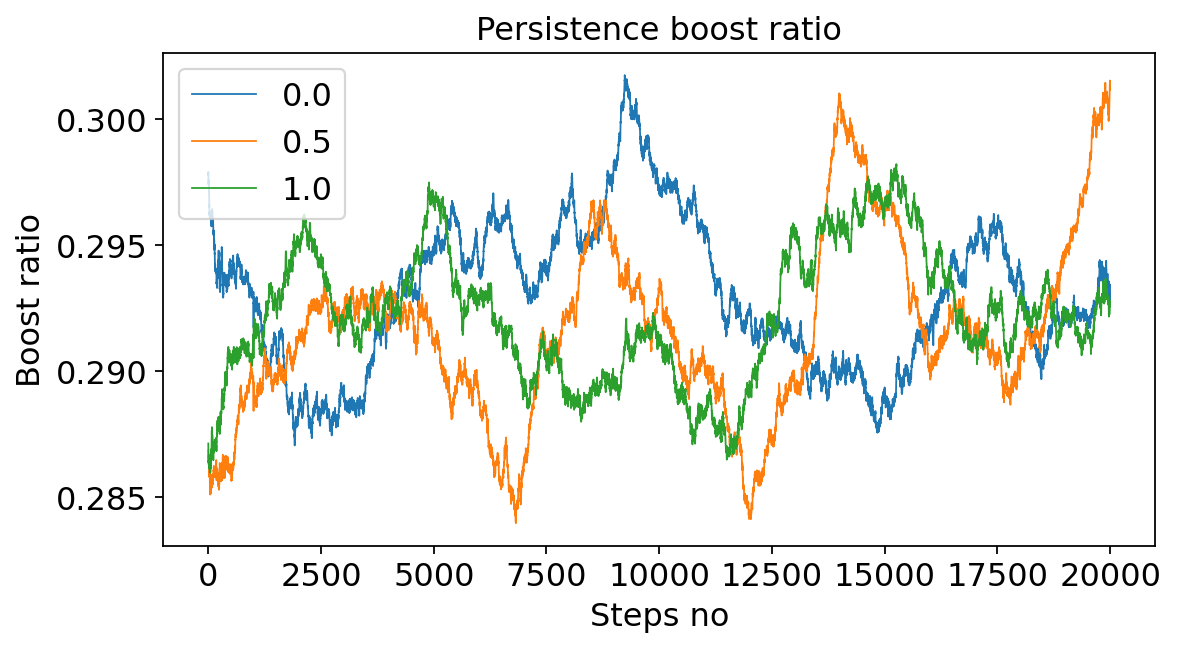

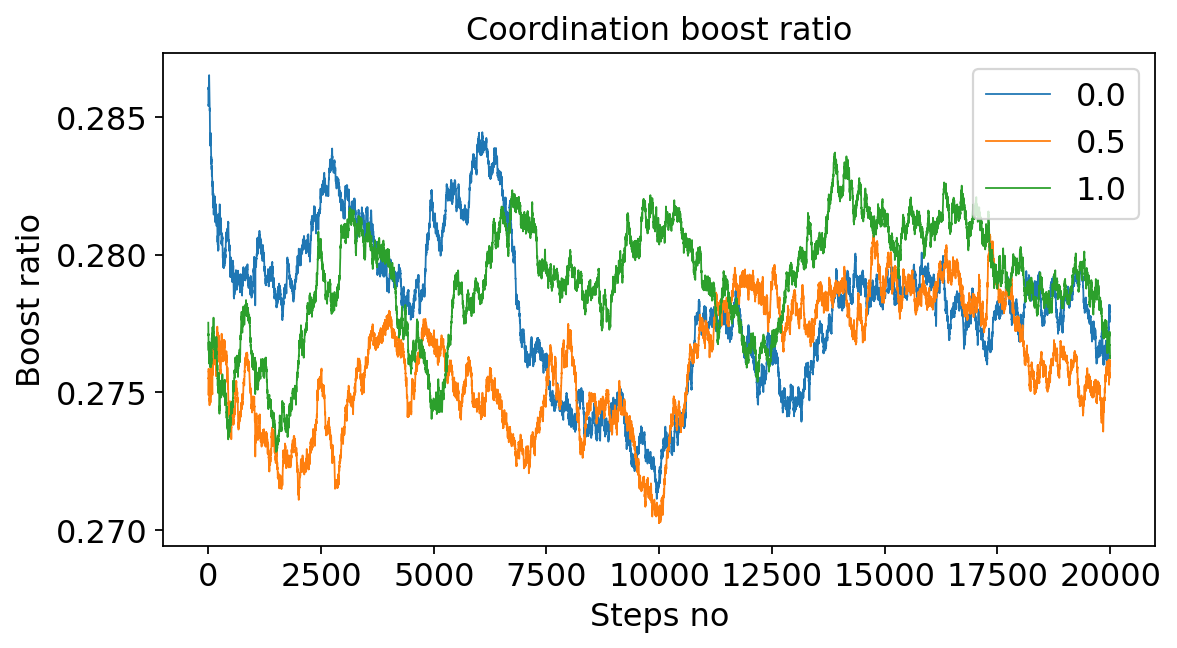

In [21]:
axis_x = []
persistence_boost_ratios = []
coordination_boost_ratios = []

f, ax1 = plt.subplots(figsize=(8, 4), dpi=160)
f2, ax2 = plt.subplots(figsize=(8, 4), dpi=160)

AVG_STEPS = 2000

for boost_value, row in results_df[
    ["persistence_boost_value"] + new_column_names
].groupby(by="persistence_boost_value"):
    a = running_avg(
        np.average(np.array(row["persistence_boost_count"].to_list()), axis=0),
        AVG_STEPS,
    )
    b = running_avg(
        np.average(np.array(row["no_persistence_boost_count"].to_list()), axis=0),
        AVG_STEPS,
    )

    print(a.shape)

    persist_ratio = a / (a + b)

    ax1.plot(
        np.arange(len(persist_ratio)), persist_ratio, linewidth=0.8, label=boost_value
    )

    a = running_avg(
        np.average(np.array(row["coordination_boost_count"].to_list()), axis=0),
        AVG_STEPS,
    )
    b = running_avg(
        np.average(np.array(row["no_coordination_boost_count"].to_list()), axis=0),
        AVG_STEPS,
    )

    coord_ratio = a / (a + b)

    ax2.plot(np.arange(len(coord_ratio)), coord_ratio, linewidth=0.8, label=boost_value)


ax1.set_ylabel("Boost ratio")
ax1.set_xlabel("Steps no")
ax1.set_title("Persistence boost ratio")
# ax1.set_ylim(
#     bottom=min(persistence_boost_ratios) - 0.01,
#     top=max(persistence_boost_ratios) + 0.01,
# )
ax1.legend()

ax2.set_ylabel("Boost ratio")
ax2.set_xlabel("Steps no")
ax2.set_title("Coordination boost ratio")
ax2.legend()

# ax2.set_ylim(
#     bottom=min(coordination_boost_ratios) - 0.01,
#     top=max(coordination_boost_ratios) + 0.01,
# )
# persistence_boost_ratios.append(a / (a + b))

## Analyze derivative of goal distance (vs. boost value)

In [22]:
derivative_df = results_df


def get_derivative(index):
    results = load_partial(index).values()

    dists = np.array([r["goal_dist"] for r in results])

    gradient = np.gradient(dists, axis=0)
    return np.average(gradient, axis=0)


derivative_df["derivative"] = [
    get_derivative(index) for index in tqdm(results_df.index)
]
derivative_df.head()

100%|██████████| 81/81 [00:02<00:00, 34.89it/s]


perception  persistence  coordination  persistence_boost_value  \
0         0.1          0.1           0.1                      0.0   
1         0.1          0.1           0.1                      0.5   
2         0.1          0.1           0.1                      1.0   
3         0.1          0.1           0.5                      0.0   
4         0.1          0.1           0.5                      0.5   

   coordination_boost_value  success_steps  \
0                       0.0        20000.0   
1                       0.5        20000.0   
2                       1.0        20000.0   
3                       0.0        20000.0   
4                       0.5        20000.0   

                             persistence_boost_count  \
0  [0.0, 0.0, 0.0, 0.18181818181818182, 0.0909090...   
1  [0.0, 0.0, 0.0, 0.18181818181818182, 0.0, 0.0,...   
2  [0.0, 0.0, 0.0, 0.18181818181818182, 0.0909090...   
3  [0.0, 0.0, 0.0, 0.18181818181818182, 0.0, 0.0,...   
4  [0.0, 0.0, 0.0, 0.09090909090909091, 0.0909090...   

                          no_persistence_boost_count  \
0  [0.0, 0.0, 0.0, 0.0, 0.7272727272727273, 0.0, ...   
1  [0.0, 0.0, 0.0, 0.0, 0.8181818181818182, 0.0, ...   
2  [0.0, 0.0, 0.0, 0.0, 0.7272727272727273, 0.0, ...   
3  [0.0, 0.0, 0.0, 0.0, 0.8181818181818182, 0.0, ...   
4  [0.0, 0.0, 0.0, 0.0, 0.8181818181818182, 0.0, ...   

                            coordination_boost_count  \
0  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
1  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
2  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
3  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
4  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                         no_coordination_boost_count  persistence_boost_ratio  \
0  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...                 0.296378   
1  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...                 0.290069   
2  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...                 0.289598   
3  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...                 0.286480   
4  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...                 0.296631   

   coordination_boost_ratio                                         derivative  
0                  0.263236  [0.015004545454545852, 0.015004545454545852, 0...  
1                  0.279887  [0.13825818181818114, 0.13825818181818114, 0.1...  
2                  0.281285  [0.007673636363636211, 0.007673636363636211, 0...  
3                  0.282411  [0.10039999999999984, 0.10039999999999984, 0.1...  
4                  0.272209  [0.07659863636363666, 0.07659863636363666, 0.0...

### Graph average derivative for all runs

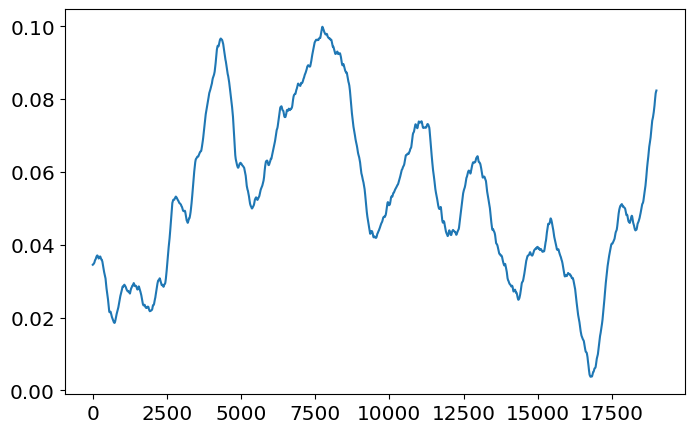

In [61]:
avg_derivative = np.array(derivative_df["derivative"].to_list())
avg_derivative = np.average(avg_derivative, axis=0)

plt.plot(running_avg(avg_derivative, 1000, m="valid"))

### Graph only successful runs

(226, 20000)


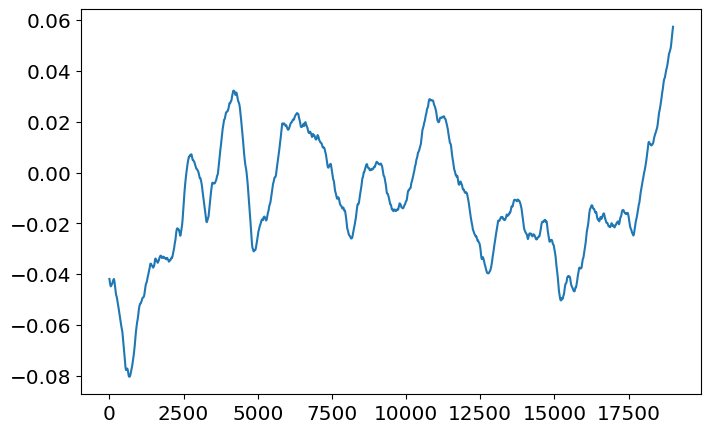

In [60]:
avg_derivative = np.array(
    derivative_df[derivative_df["success_steps"].notnull()]["derivative"].to_list()
)
print(avg_derivative.shape)
avg_derivative = np.average(avg_derivative, axis=0)

plt.plot(running_avg(avg_derivative, 1000, m="valid"))

## Moving average

In [116]:
def moving_average(a, n=3):
    # Add zeros at the beginning, so the result doesn't change dimensions
    a = np.concatenate([([0] * (n - 1)), a])

    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1 :] / n


def visualize_run(run, average_steps=500, extra_title=""):
    x = list(range(run["iterations"]))

    step_stats = run["goal_distance"]
    parent_stats = run["parent_tps"]
    infant_stats = run["infant_tps"]

    parent_stats = moving_average(parent_stats, average_steps)
    infant_stats = moving_average(infant_stats, average_steps)

    fig, ax1 = plt.subplots()

    ax1.plot(x, step_stats, color="r")
    ax1.set_ylim(bottom=0, top=50)
    ax1.set_ylabel("toy distance")
    ax1.set_xlabel("step")

    title = f'perc={run["perception"]:.2f}, pers={run["persistence"]:.2f}, \
coord={run["coordination"]:.2f},\n\
avg for {run["repeats"]} runs'

    if extra_title != "":
        title = extra_title + "\n" + title

    ax1.set_title(title)
    ax1.legend(["toy distance"], loc="lower right")

    ax2 = ax1.twinx()
    ax2.plot(x, parent_stats, color="b")
    ax2.set_ylabel("TPS")

    ax2.plot(x, infant_stats, color="orange")
    ax2.set_ylim(bottom=0)

    ax2.axvline(x=average_steps - 1, color="grey", label="axvline - full height")
    ax2.legend(["parent TPS", "infant TPS"], loc="upper right")

    x_ticks = np.append(ax1.get_xticks()[1:-1], average_steps)
    ax1.set_xticks(x_ticks)
    ax2.set_xticks(x_ticks)

    fig.tight_layout()
    # plt.savefig(f'../../plots/big_{current_param}.png', dpi=300)
    plt.show()

### Show a couple of randomly selected runs and see how they performed

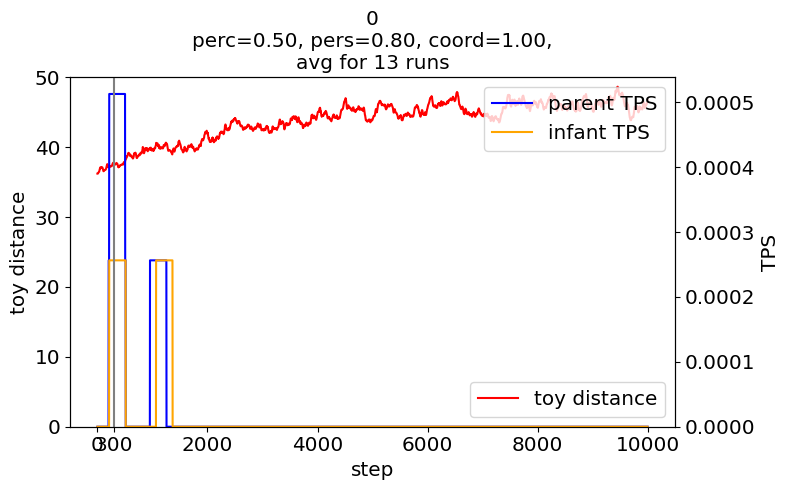

In [6]:
average_steps = 300

random_runs = np.random.choice(range(len(df)), size=1, replace=False)
for r in random_runs:
    visualize_run(df.iloc[r, :], extra_title=str(r), average_steps=average_steps)

## TPS - third person state

### 1. Using steps required to reach emergent action as a metric

### Add new column, which determines if the run was successful and if so - in how many steps the goal has been achieved

In [10]:
df["success_steps"] = df.apply(
    lambda row: get_success_step(row["goal_distance"], SUCCESS_DIST), axis=1
)
df.sort_values(by=["success_steps"]).head(16)

perception  persistence  coordination  repeats  iterations  \
15    0.900000     0.000000      0.100000       11       15000   
27    0.633333     0.366667      0.100000       11       15000   
31    0.633333     0.000000      0.100000       11       15000   
11    0.900000     0.366667      0.100000       11       15000   
23    0.633333     0.433333      0.100000       11       15000   
7     0.900000     0.433333      0.000000       11       15000   
30    0.633333     0.100000      0.366667       11       15000   
47    0.366667     0.100000      0.100000       11       15000   
19    0.633333     0.700000      0.100000       11       15000   
3     0.900000     0.700000      0.100000       11       15000   
43    0.366667     0.366667      0.100000       11       15000   
39    0.366667     0.433333      0.100000       11       15000   
10    0.900000     0.366667      0.366667       11       15000   
14    0.900000     0.000000      0.366667       11       15000   
0     0.900000     0.900000      0.900000       11       15000   
1     0.900000     0.900000      0.633333       11       15000   

                                        goal_distance  \
15  [36.160820030176815, 36.160820030176815, 36.15...   
27  [36.058102049644326, 36.058102049644326, 36.05...   
31  [36.10495501916605, 36.10495501916604, 36.1288...   
11  [35.98382655350573, 35.98382655350573, 35.9850...   
23  [35.85149045507967, 35.85149045507967, 35.8501...   
7   [36.22922171061668, 36.22922171061668, 36.2172...   
30  [35.79082090815256, 35.79082090815256, 35.8000...   
47  [36.09651950793614, 36.09651950793614, 36.0899...   
19  [36.14991388106114, 36.14991388106114, 36.1592...   
3   [36.206589466738414, 36.206589466738414, 36.21...   
43  [36.250849859894714, 36.250849859894714, 36.25...   
39  [36.43544148026676, 36.43544148026676, 36.4354...   
10  [36.126491707553015, 36.126491707553015, 36.14...   
14  [35.97042651559366, 35.97042651559366, 35.9666...   
0   [36.38576512405545, 36.38576512405545, 36.3969...   
1   [35.98344152290745, 35.98344152290745, 35.9814...   

                                           parent_tps  \
15  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
27  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
31  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
11  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
23  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
7   [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
30  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
47  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
19  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
3   [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
43  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
39  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
10  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
14  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
0   [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
1   [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                                           infant_tps  success_steps  
15  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...          695.0  
27  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...          822.0  
31  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...          822.0  
11  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...          895.0  
23  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...          895.0  
7   [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...          936.0  
30  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...         1312.0  
47  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...         1433.0  
19  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...         1595.0  
3   [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...         1981.0  
43  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...         2785.0  
39  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...         8723.0  
10  [0.0, 0.0, 0.0

In [8]:
df.loc[:, "success_steps"].mean()

nan

### Show the histogram of minimum distance in each run, and histogram of the number of steps required to reach the goal

In [81]:
df.loc[:, "success_steps"].count()

874

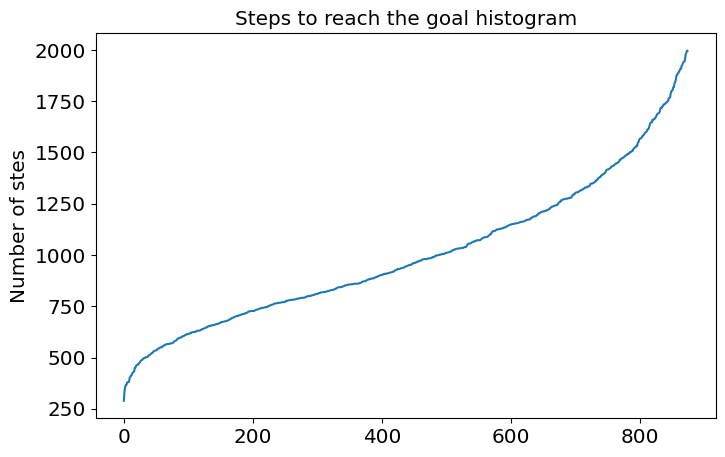

In [75]:
y = (
    df[df["success_steps"].notna()]
    .apply(lambda row: np.min(row["success_steps"]), axis=1)
    .sort_values()
    .to_numpy()
)

fig, ax = plt.subplots()
ax.plot(y)
ax.set_title("Steps to reach the goal histogram")
ax.set_ylabel("Number of stes")
plt.show()

### See how the best run performed, for different number of steps used in calculating the moving average
(the grey vertical line shows the number of steps used for calculating the average)

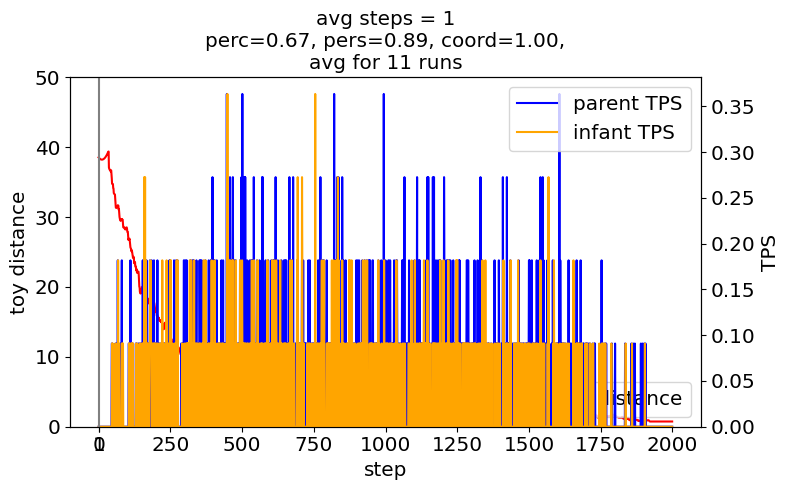

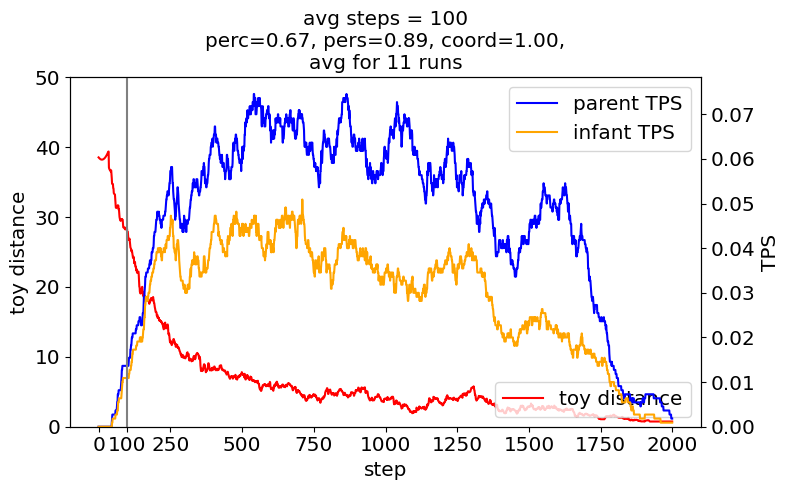

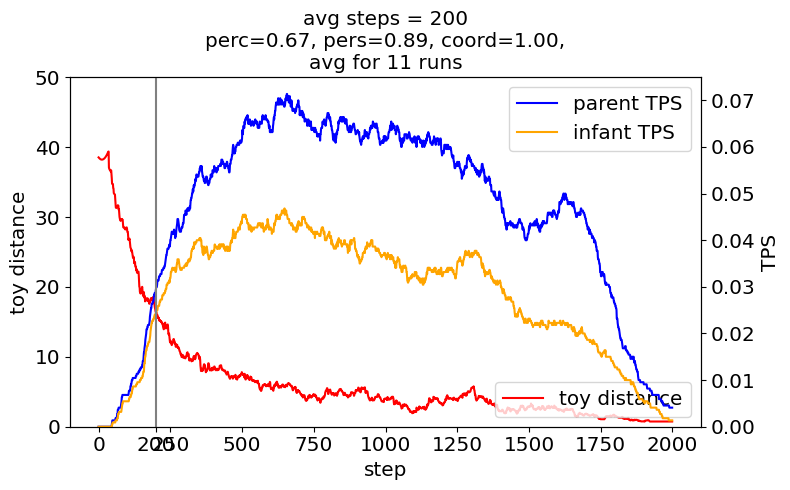

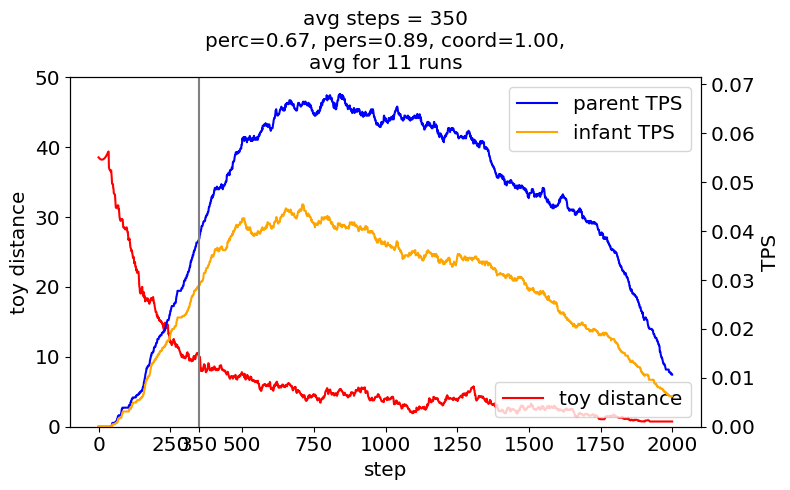

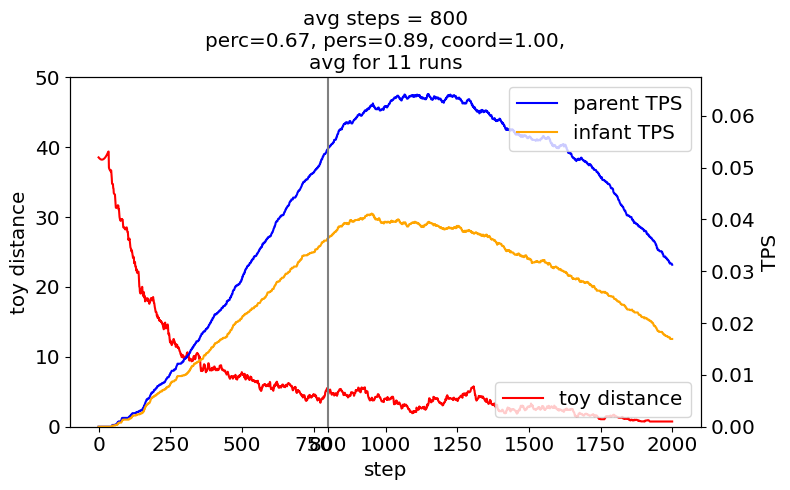

In [83]:
for steps in [1, 100, 200, 350, 800]:
    visualize_run(
        df.sort_values(by=["success_steps"]).iloc[0, :],
        average_steps=steps,
        extra_title=f"avg steps = {steps}",
    )

### Create heatmap for 2 variables
We define two ways of creating the heatmap:
1. Find 3 paramters which change the least in the top N runs and free the remaining two
2. Find the top 2 parameters that changed the least in the top N runs. Then group all data by those two parameters, averaging the remaining values - most importantly - the selected metric values

In [52]:
def get_heatmap_data_fixed(df, metric, top_runs_no, ascending=True):
    top_runs = df.sort_values(by=[metric], ascending=ascending).head(top_runs_no)

    params_data = []

    for param in ["perception", "persistence", "coordination"]:
        bincount = np.bincount(top_runs[param])
        count = np.max(bincount)
        value = np.argmax(bincount)

        params_data.append([param, value, count])

    params_df = pd.DataFrame(
        params_data, columns=["param", "best_value", "count"]
    ).sort_values("count", ascending=False)
    print(params_df)
    fixed_params = (
        params_df.head(1).loc[:, ["param", "best_value"]].to_numpy().reshape(2)
    )
    free_params = (
        params_df.tail(2).loc[:, ["param", "best_value"]].to_numpy().reshape(4)
    )

    p1, v1 = fixed_params
    param1, val1, param2, val2 = free_params

    selected_runs = df[(df[p1] == v1)]
    selected_runs = selected_runs.sort_values(by=[param1, param2])

    labels1 = selected_runs[param1].unique().round(3)
    labels2 = selected_runs[param2].unique().round(3)

    hm_data = selected_runs[metric].to_numpy().reshape(len(labels1), len(labels2)).T

    return hm_data, fixed_params, [param1, param2], [labels1, labels2]

In [48]:
def create_heatmap(heatmap_data, labelsx, labelsy, invert_colors=False, title=""):
    assert heatmap_data.shape == (len(labelsy), len(labelsx))

    colormap_data = np.nan_to_num(heatmap_data, nan=(np.nanmax(heatmap_data) + 100))

    fig, ax = plt.subplots(figsize=(8, 8))

    if invert_colors:
        cmap = matplotlib.colormaps["viridis_r"]
    else:
        cmap = matplotlib.colormaps["viridis"]
    im = ax.imshow(colormap_data, cmap=cmap)

    # Show all ticks and label them with the respective list entries
    ax.set_xticks(np.arange(len(labelsx)), labels=labelsx)
    ax.set_yticks(np.arange(len(labelsy)), labels=labelsy)

    ax.set_xlabel(param1)
    ax.set_ylabel(param2)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    for i in range(len(labelsx)):
        for j in range(len(labelsy)):
            text = ax.text(
                i,
                j,
                heatmap_data[j, i],
                ha="center",
                va="center",
                color="w",
                fontsize=14,
            )

    ax.set_title(title)
    fig.tight_layout()
    plt.show()

### Show the heatmap for the fixed 3 parameters, which were the most common in the top 30 runs

          param  best_value  count
2  coordination           0     30
0    perception           0     25
1   persistence           0     21


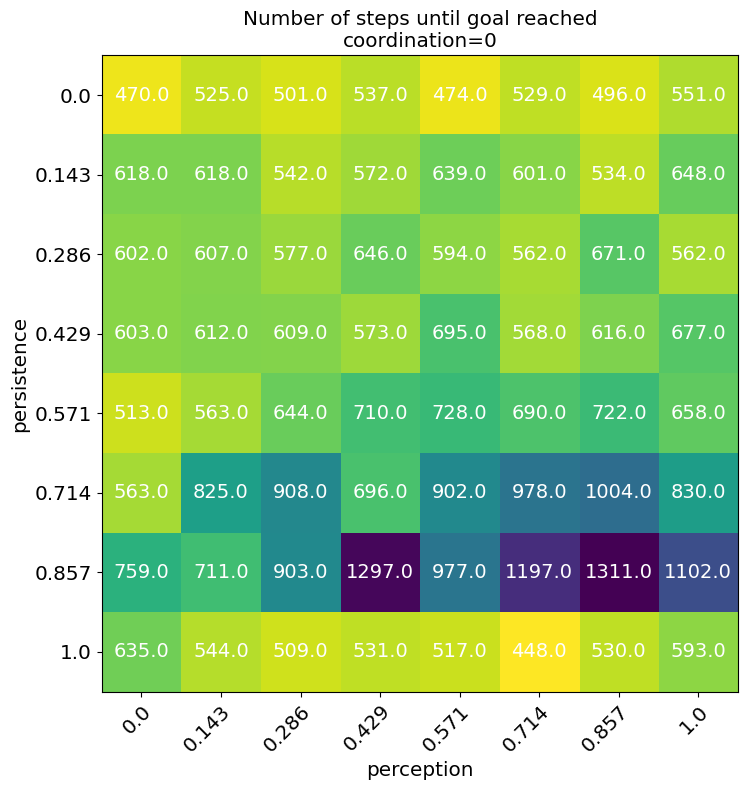

In [53]:
(
    hm_data,
    [p1, v1],
    [param1, param2],
    [labels1, labels2],
) = get_heatmap_data_fixed(df, "success_steps", top_runs_no=30)
title = f"Number of steps until goal reached\n{p1}={v1}"
create_heatmap(hm_data, labels1, labels2, invert_colors=True, title=title)

### Using TPS (third-party state) measure as a metric

Let's define two metrics - maximum TPS throughout the run, and TPS at the end of the run. 
Both values will be calculated using the moving average.
We will measure the TPS for parent and infant separately.

In [23]:
average_steps = 500

In [15]:
def moving_average(a, n=3):
    # Add zeros at the beginning, so the result doesn't change dimensions
    a = np.concatenate([([0] * (n - 1)), a])

    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1 :] / n

In [24]:
df_tps = df.copy()

df_tps["parent_tps_max"] = df.apply(
    lambda row: moving_average(row["parent_satisfaction"], n=average_steps).max(),
    axis=1,
)
df_tps["parent_tps_end"] = df.apply(
    lambda row: moving_average(row["parent_satisfaction"], n=average_steps)[-1], axis=1
)
df_tps["infant_tps_max"] = df.apply(
    lambda row: moving_average(row["infant_satisfaction"], n=average_steps).max(),
    axis=1,
)
df_tps["infant_tps_end"] = df.apply(
    lambda row: moving_average(row["infant_satisfaction"], n=average_steps)[-1], axis=1
)

In [25]:
new_df = df_tps.groupby(["coordination", "precision"]).mean(numeric_only=True)
new_df

width  height  speed  lego_count  exploration  \
coordination precision                                                  
0.0          20.0       300.0   300.0    2.0         4.0         50.0   
             40.0       300.0   300.0    2.0         4.0         50.0   
             60.0       300.0   300.0    2.0         4.0         50.0   
             80.0       300.0   300.0    2.0         4.0         50.0   
             100.0      300.0   300.0    2.0         4.0         50.0   
25.0         20.0       300.0   300.0    2.0         4.0         50.0   
             40.0       300.0   300.0    2.0         4.0         50.0   
             60.0       300.0   300.0    2.0         4.0         50.0   
             80.0       300.0   300.0    2.0         4.0         50.0   
             100.0      300.0   300.0    2.0         4.0         50.0   
50.0         20.0       300.0   300.0    2.0         4.0         50.0   
             40.0       300.0   300.0    2.0         4.0         50.0   
             60.0       300.0   300.0    2.0         4.0         50.0   
             80.0       300.0   300.0    2.0         4.0         50.0   
             100.0      300.0   300.0    2.0         4.0         50.0   
75.0         20.0       300.0   300.0    2.0         4.0         50.0   
             40.0       300.0   300.0    2.0         4.0         50.0   
             60.0       300.0   300.0    2.0         4.0         50.0   
             80.0       300.0   300.0    2.0         4.0         50.0   
             100.0      300.0   300.0    2.0         4.0         50.0   
100.0        20.0       300.0   300.0    2.0         4.0         50.0   
             40.0       300.0   300.0    2.0         4.0         50.0   
             60.0       300.0   300.0    2.0         4.0         50.0   
             80.0       300.0   300.0    2.0         4.0         50.0   
             100.0      300.0   300.0    2.0         4.0         50.0   

                        responsiveness  relevance  repeats  max_iter  \
coordination precision                                                 
0.0          20.0                 50.0       50.0    100.0    5000.0   
             40.0                 50.0       50.0    100.0    5000.0   
             60.0                 50.0       50.0    100.0    5000.0   
             80.0                 50.0       50.0    100.0    5000.0   
             100.0                50.0       50.0    100.0    5000.0   
25.0         20.0                 50.0       50.0    100.0    5000.0   
             40.0                 50.0       50.0    100.0    5000.0   
             60.0                 50.0       50.0    100.0    5000.0   
             80.0                 50.0       50.0    100.0    5000.0   
             100.0                50.0       50.0    100.0    5000.0   
50.0         20.0                 50.0       50.0    100.0    5000.0   
             40.0                 50.0       50.0    100.0    5000.0   
             60.0                 50.0       50.0    100.0    5000.0   
             80.0                 50.0       50.0    100.0    5000.0   
             100.0                50.0       50.0    100.0    5000.0   
75.0         20.0                 50.0       50.0    100.0    5000.0   
             40.0                 50.0       50.0    100.0    5000.0   
             60.0                 50.0       50.0    100.0    5000.0   
             80.0                 50.0       50.0    100.0    5000.0   
             100.0                50.0       50.0    100.0    5000.0   
100.0        20.0                 50.0       50.0    100.0    5000.0   
             40.0                 50.0       50.0    100.0    5000.0   
             60.0                 50.0       50.0    100.0    5000.0   
             80.0                 50.0       50.0    100.0    5000.0   
             100.0                50.0       50.0    100.0    5000.0   

                        success_steps  parent_tps_max  parent_tps_end  \
coordination precision            

### Repeat all of the above, using the four newly created metrics
For each metric (`tps_max` / `tps_end`), (`parent` / `infant`) plot the run with the best result and the two types of heatmap

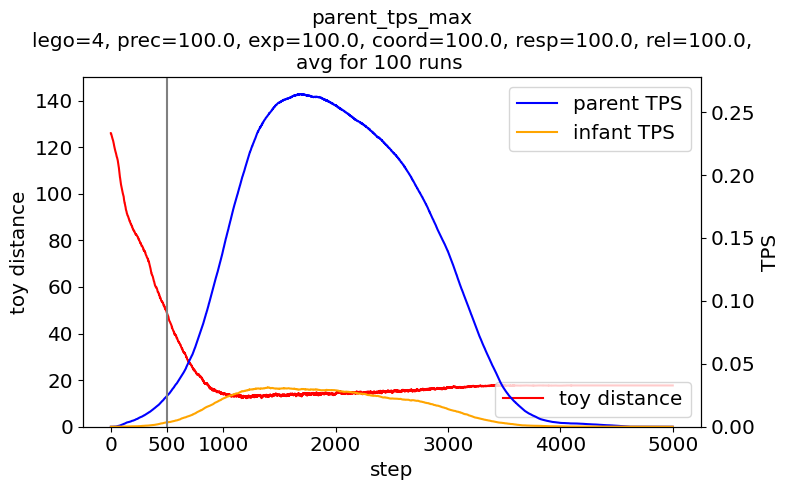

            param  best_value  count
2       relevance         100     30
3  responsiveness         100     30
0       precision         100     15
4    coordination         100     13
1     exploration          75     11


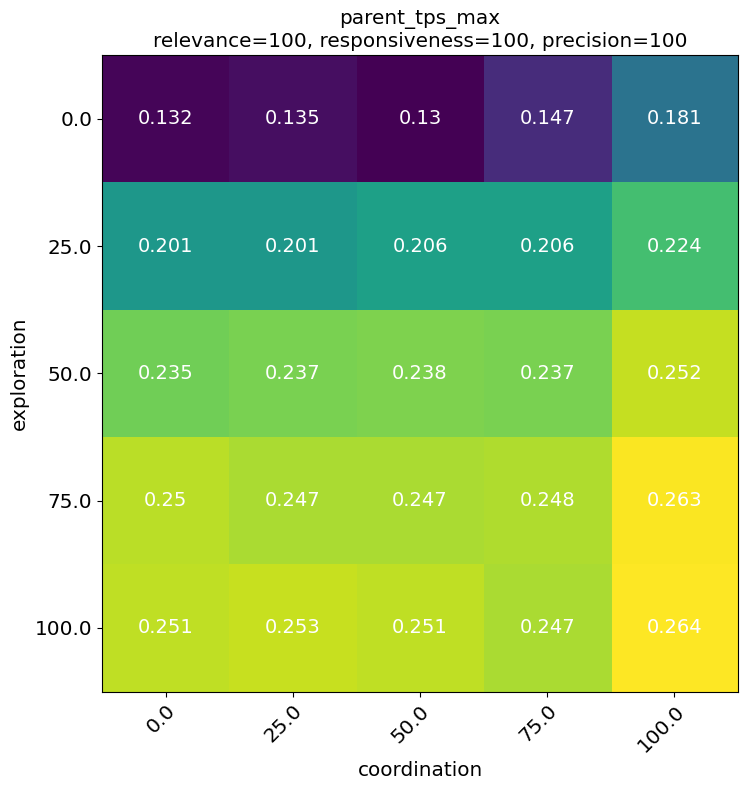

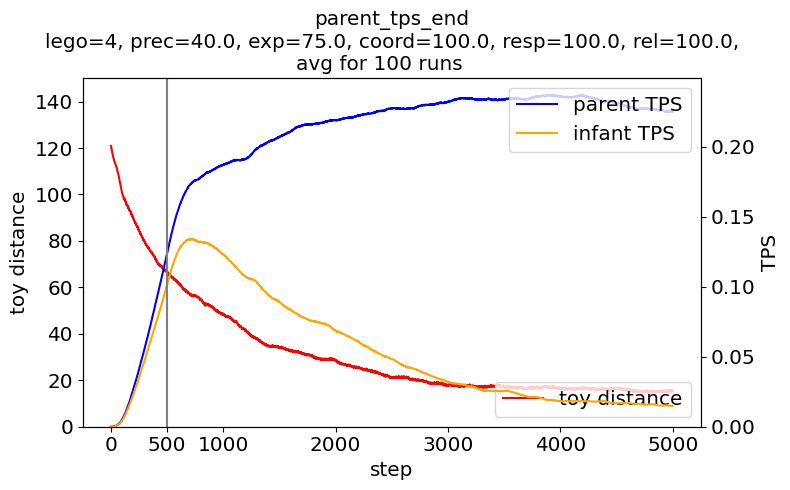

            param  best_value  count
2       relevance         100     30
3  responsiveness         100     19
4    coordination         100     18
0       precision          20     15
1     exploration          50      9


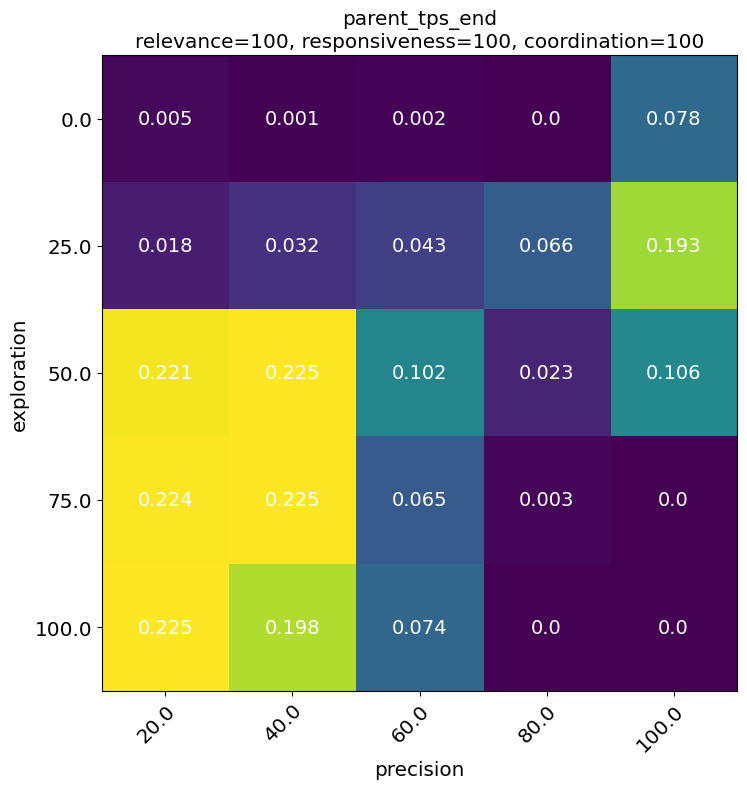

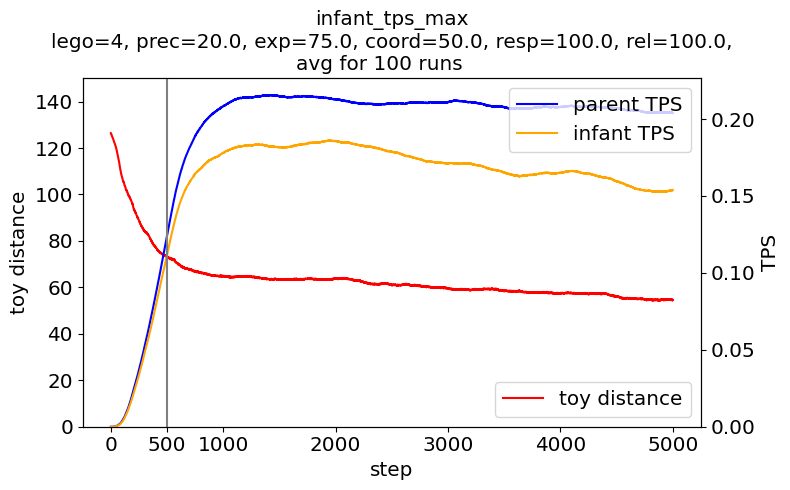

            param  best_value  count
3  responsiveness         100     30
0       precision          20     24
4    coordination         100     18
2       relevance         100     16
1     exploration          50      8


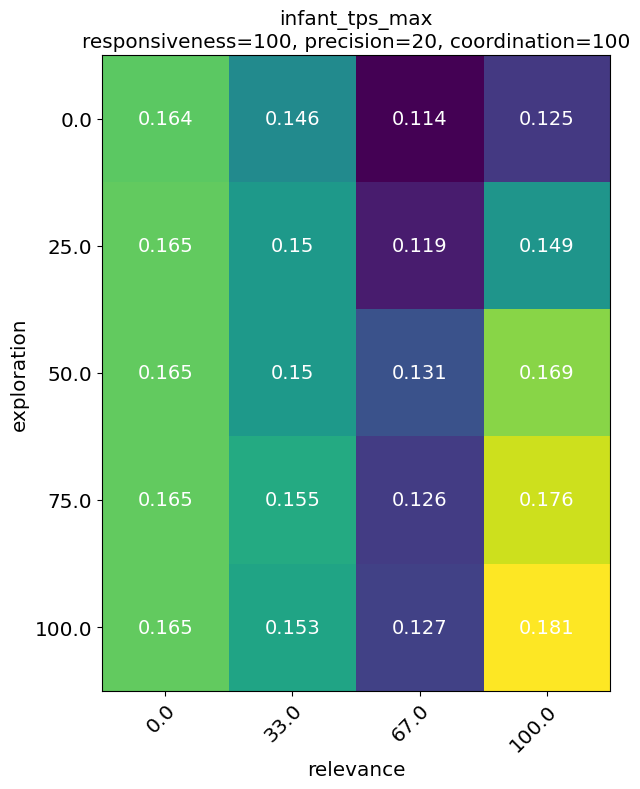

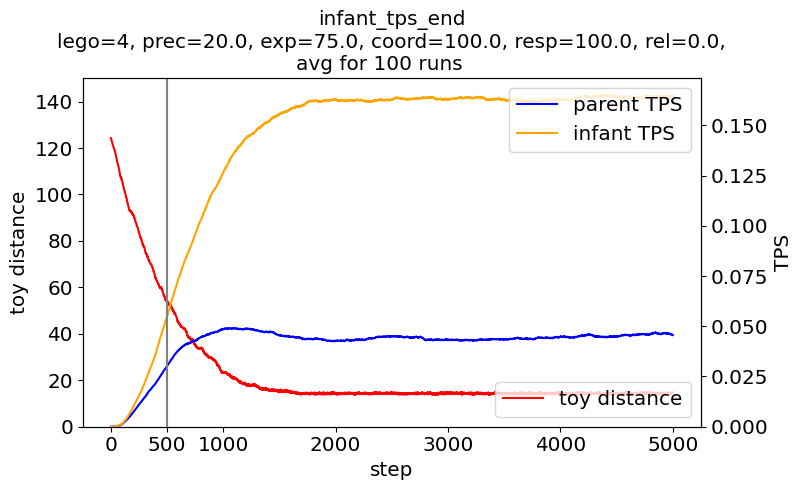

            param  best_value  count
3  responsiveness         100     30
4    coordination         100     24
0       precision          20     16
2       relevance           0     15
1     exploration          75      9


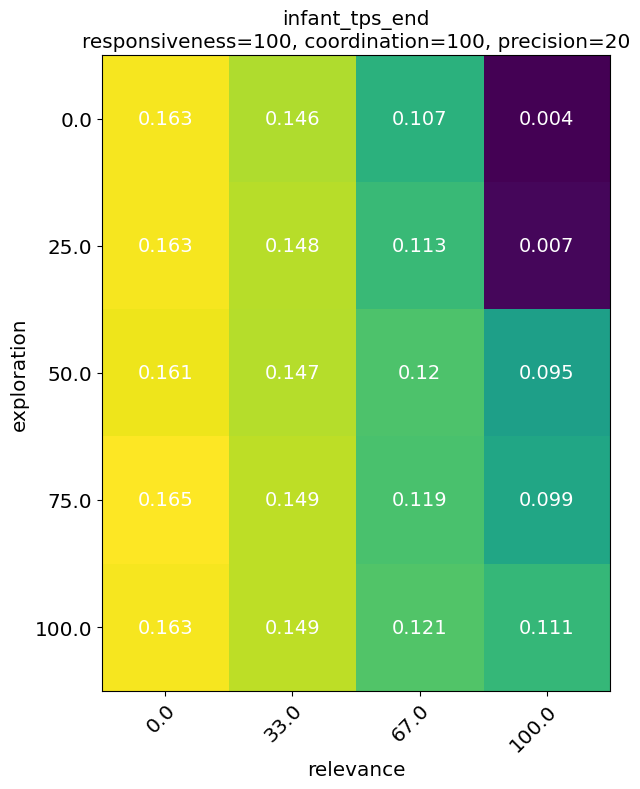

In [30]:
for agent in ["parent", "infant"]:
    for kind in ["max", "end"]:
        metric = agent + "_tps_" + kind
        visualize_run(
            df_tps.sort_values(by=[metric], ascending=False).iloc[0, :],
            average_steps=average_steps,
            extra_title=metric,
        )

        (
            hm_data,
            [p1, v1, p2, v2, p3, v3],
            [param1, param2],
            [labels1, labels2],
        ) = get_heatmap_data_fixed(df_tps, metric, top_runs_no=30, ascending=False)
        title = f"{metric}\n{p1}={v1}, {p2}={v2}, {p3}={v3}"
        create_heatmap(hm_data.round(3), labels1, labels2, title=title)